# Multiple-objective portfolio optimization

 Weight's Order:
 
 - 1 SuperFuture
 - 2 Apples
 - 3 WorldNow
 - 4 Electronics123
 - 5 Photons
 - 6 SpaceNow
 - 7 PearPear
 - 8 PositiveCorrelation
 - 9 BetterTechnology
 - 10 ABCDE
 - 11 EnviroLike
 - 12 Moneymakers
 - 13 Fuel4
 - 14 MarsProject
 - 15 CPU-XYZ
 - 16 RoboticsX
 - 17 Lasers
 - 18 WaterForce
 - 19 SafeAndCare
 - 20 BetterTomorrow

## Imports

In [1]:
from utils.MOO_utilities import *

In [2]:
### SOLVE HERE

order = ["SuperFuture", "Apples", "WorldNow", "Electronics123", "Photons", "SpaceNow", "PearPear",
         "PositiveCorrelation", "BetterTechnology", "ABCDE", "EnviroLike", "Moneymakers", "Fuel4",
         "MarsProject", "CPU-XYZ", "RoboticsX", "Lasers", "WaterForce", "SafeAndCare", "BetterTomorrow"]

## Data

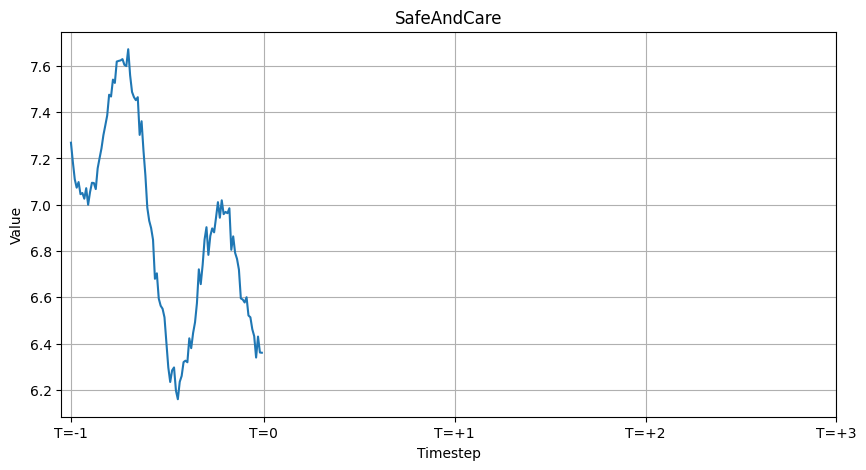

In [3]:
dr = DataReader("./data/Bundle1")
dr.read_data()
dr.plot()
data = dr.get_data()
assert len(data.keys()) == 20

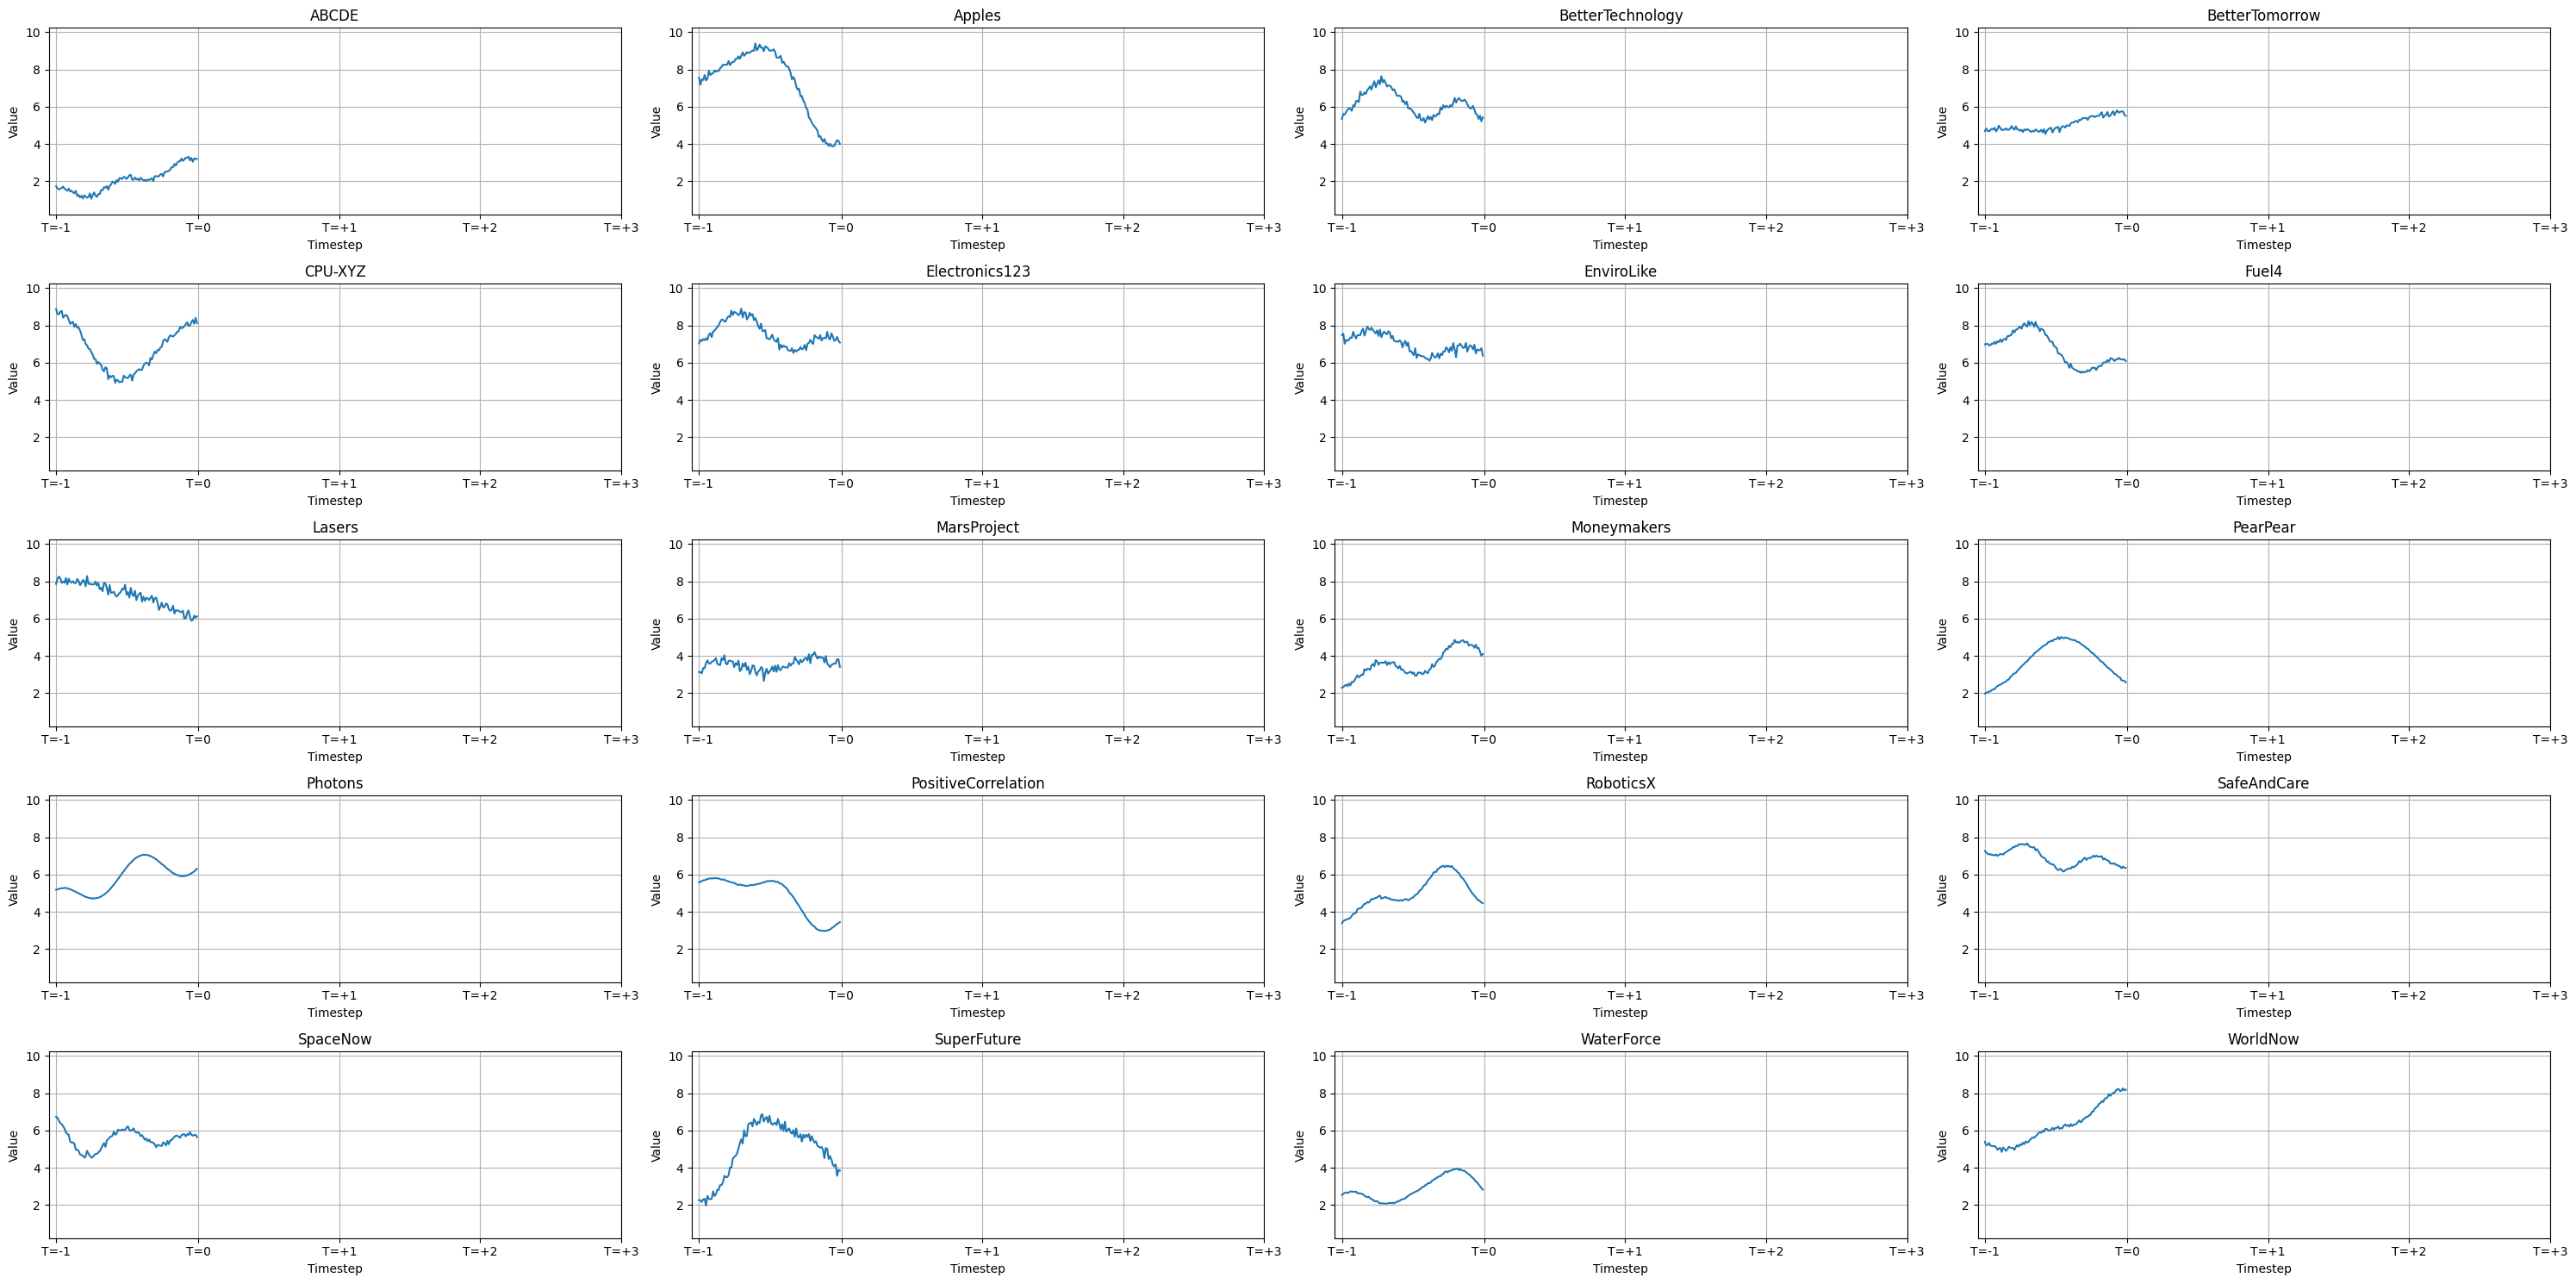

In [4]:
dr.plot_all(figsize=(30, 15), normalized_y=True)

## Regression Algorithms

### Linear Regression

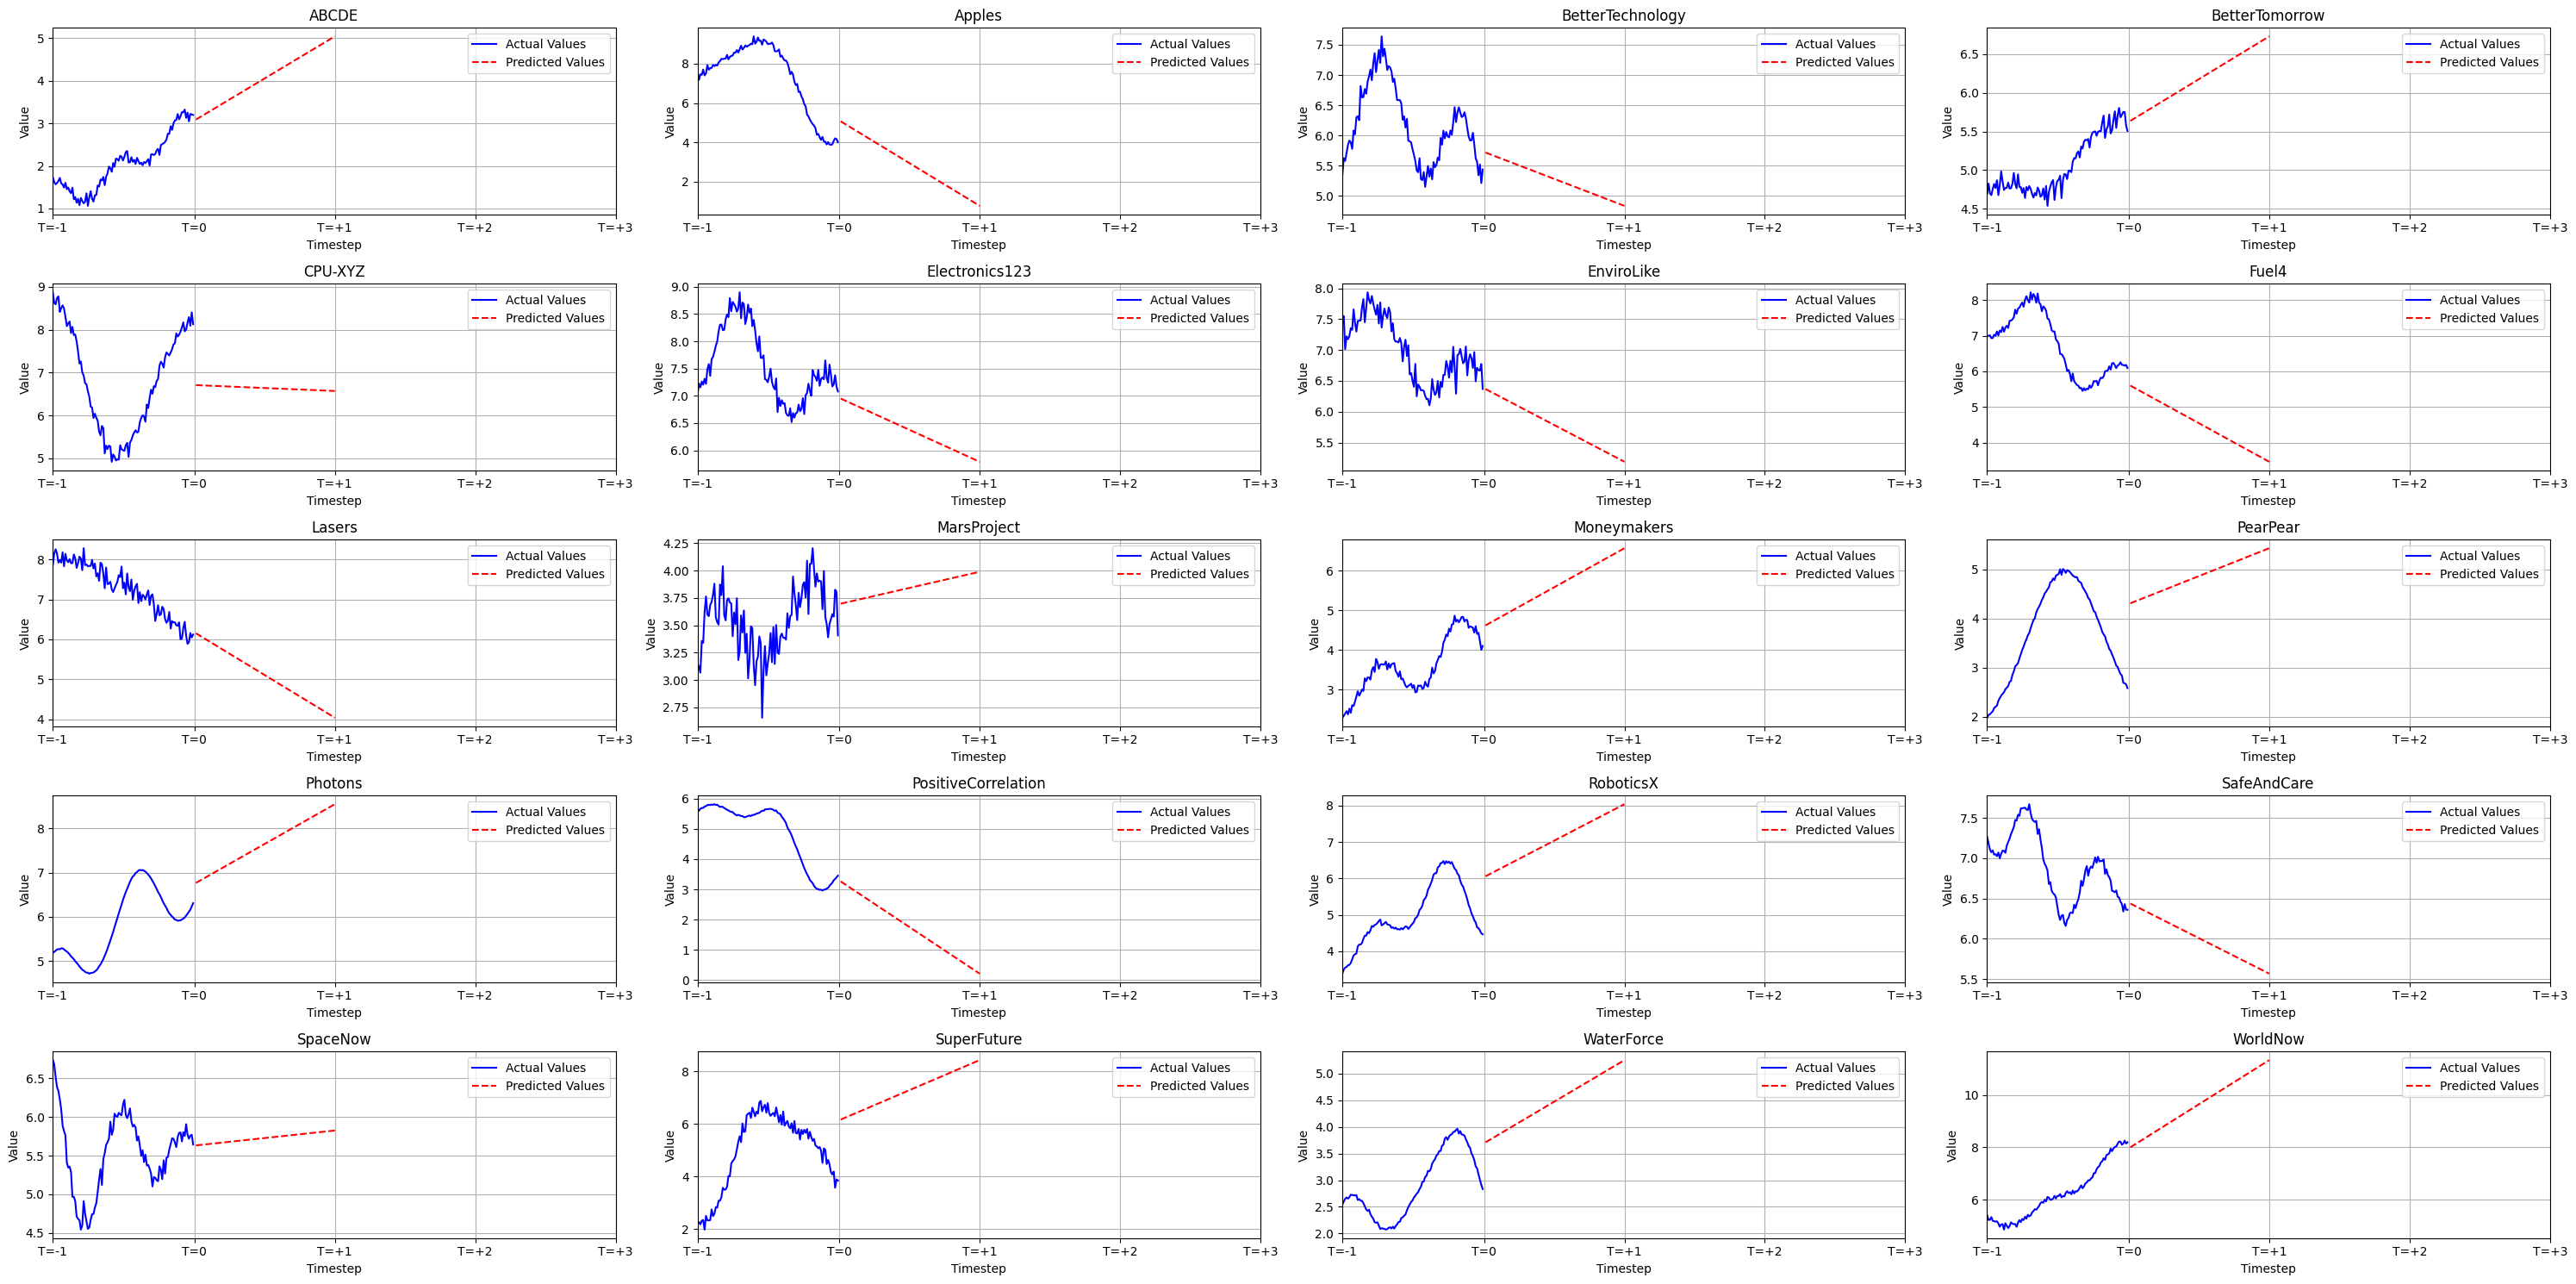

In [5]:
RMC = RegressionModelsCombined(data)
RMC.create_X_y(101)
RMC.train_linear()
linear_predictions = RMC.predict_linear()
RMC.plot_predictions(val_range=201, predictions=linear_predictions, figsize=(30, 15))

### Sinusoidal Regression

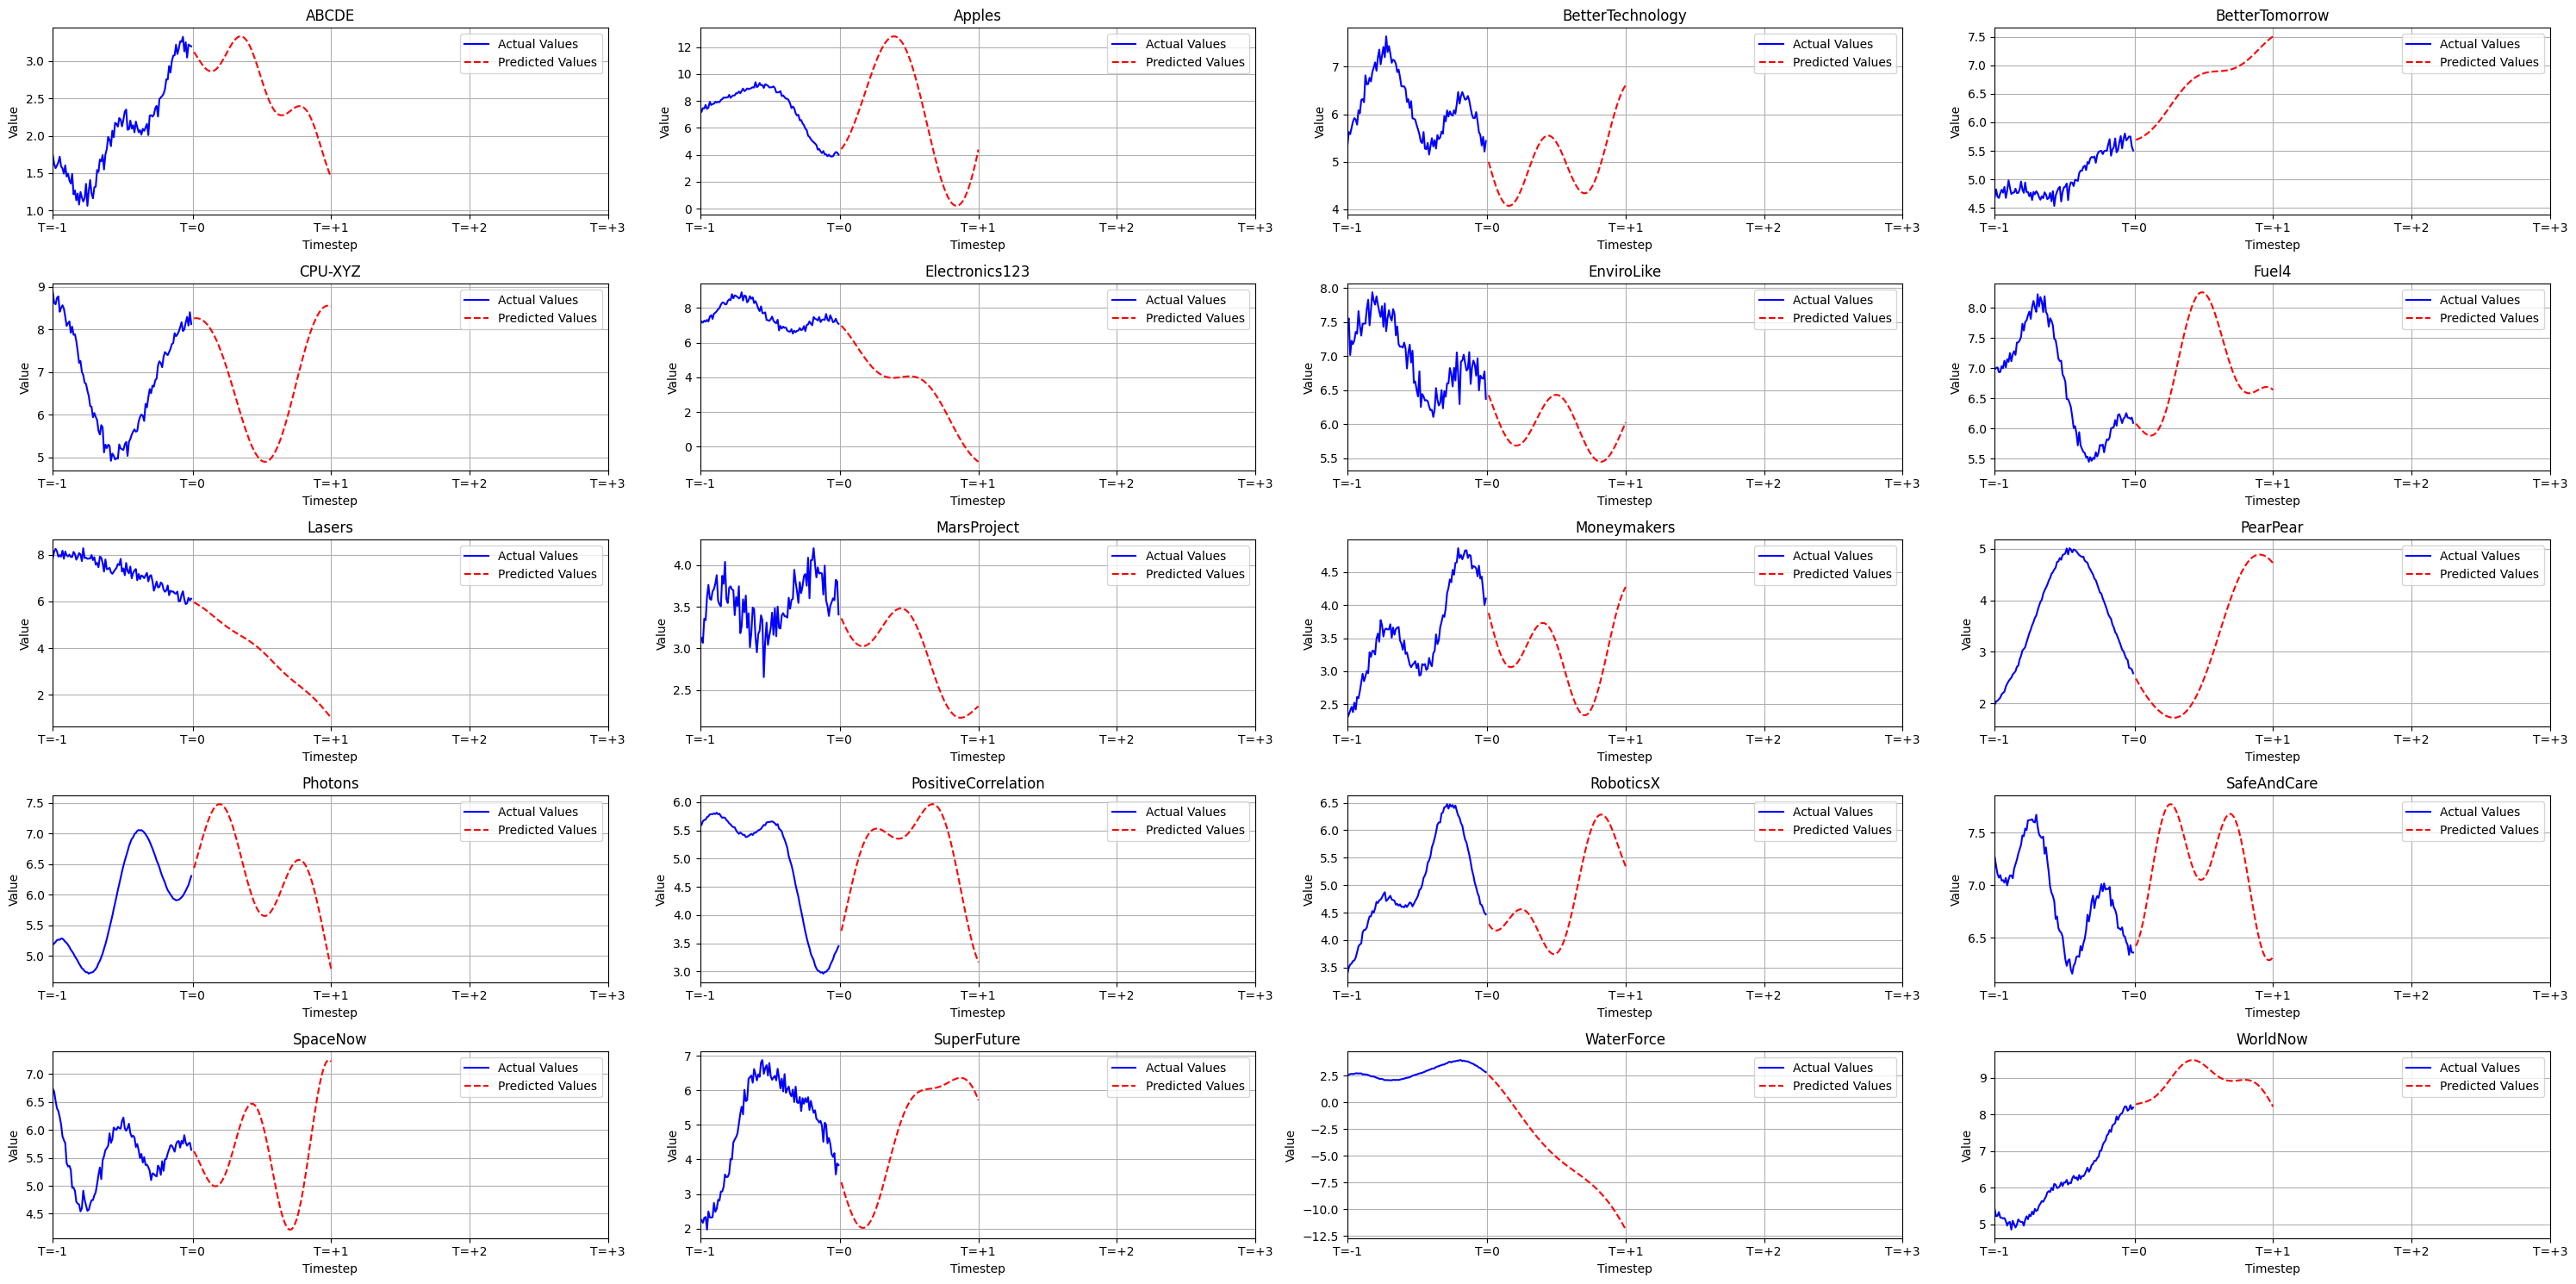

In [6]:
RMC = RegressionModelsCombined(data)
RMC.create_X_y(101)
RMC.train_sinusoidal()
sinusoidal_predictions = RMC.predict_sinusoidal()
RMC.plot_predictions(val_range=201, predictions=sinusoidal_predictions, figsize=(30, 15))

### Sinusoidal + Linear Regression

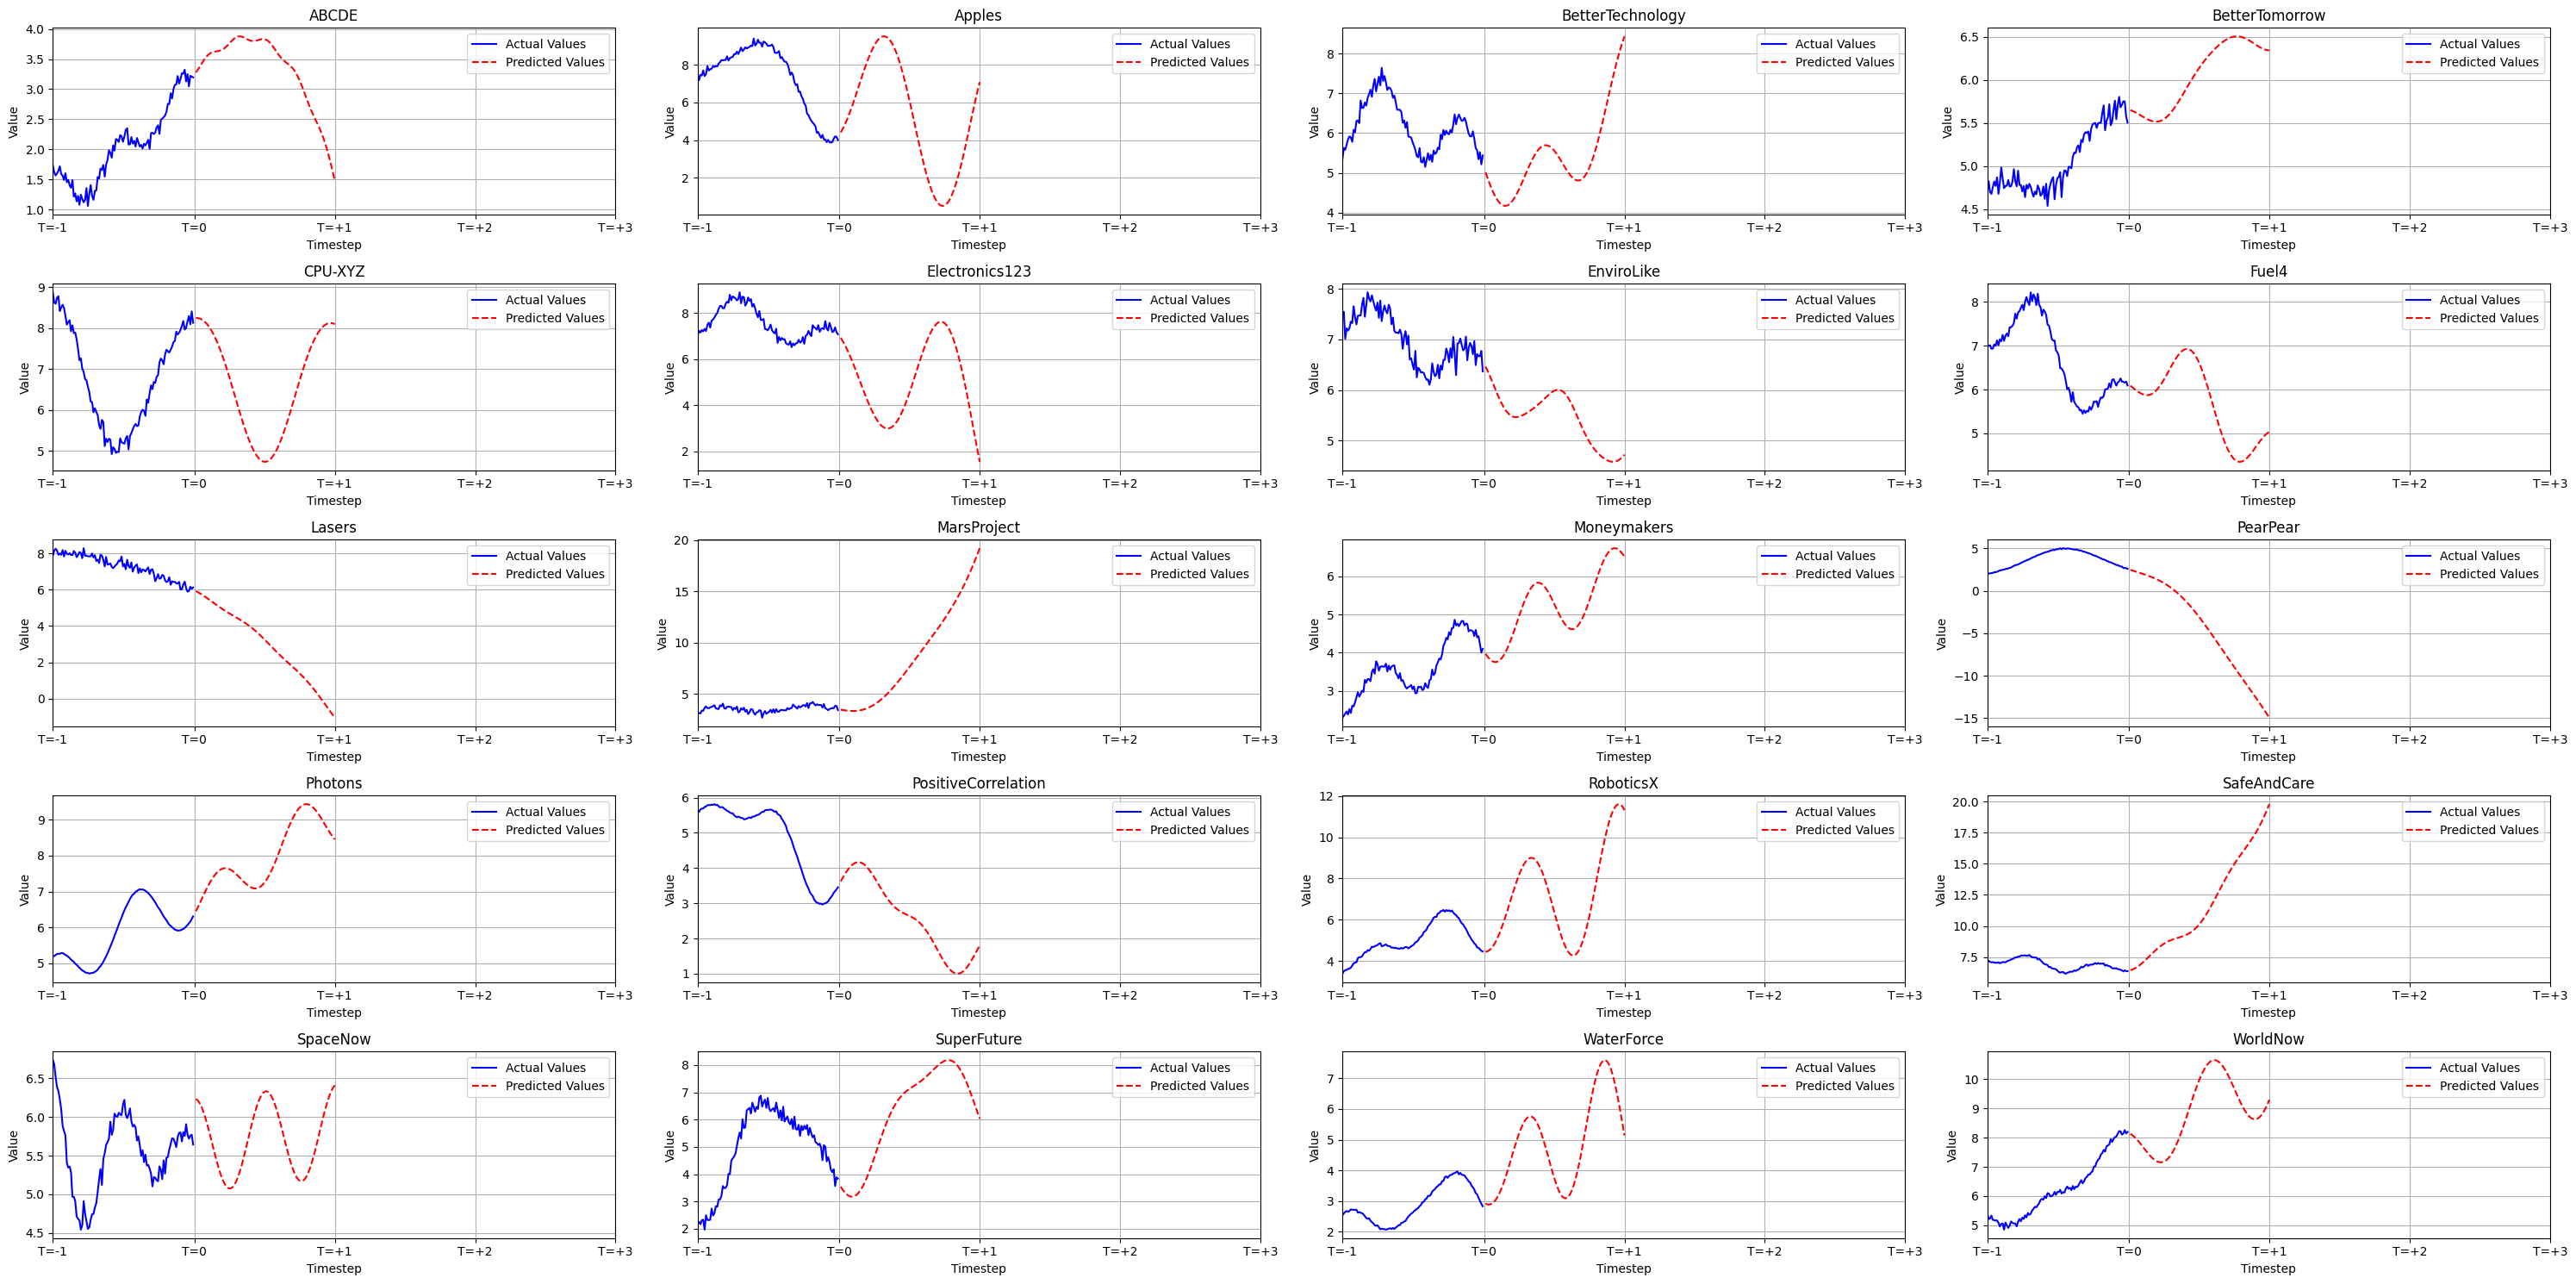

In [7]:
RMC = RegressionModelsCombined(data)
RMC.create_X_y(101)
RMC.train_complex_sinusoidal()
complex_sinusoidal_predictions = RMC.predict_complex_sinusoidal()
RMC.plot_predictions(val_range=201, predictions=complex_sinusoidal_predictions, figsize=(30, 15))

## ARIMA

Lags for company = ABCDE


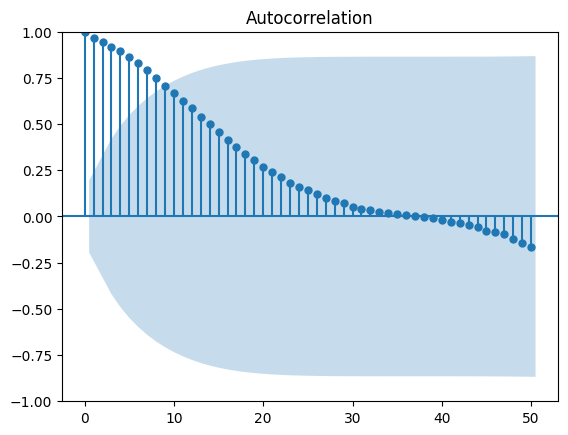

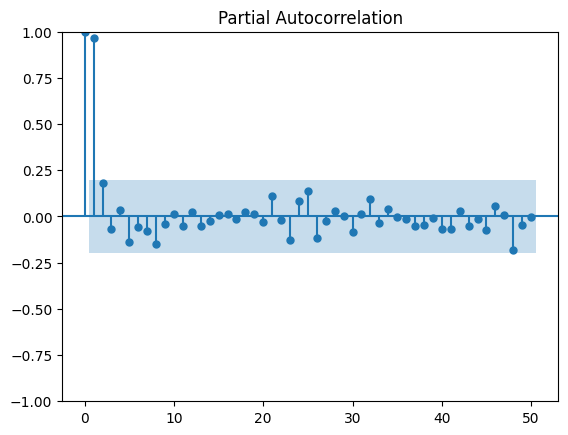

Lags for company = Apples


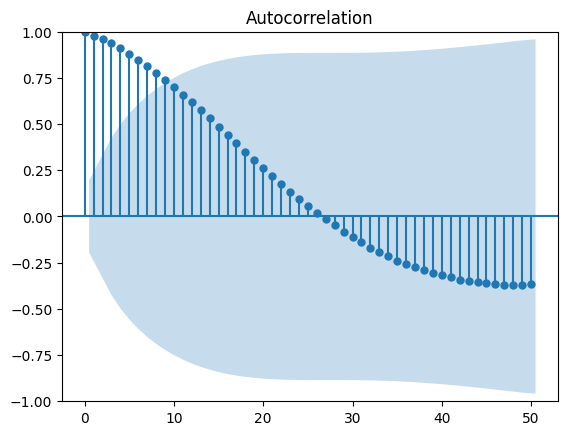

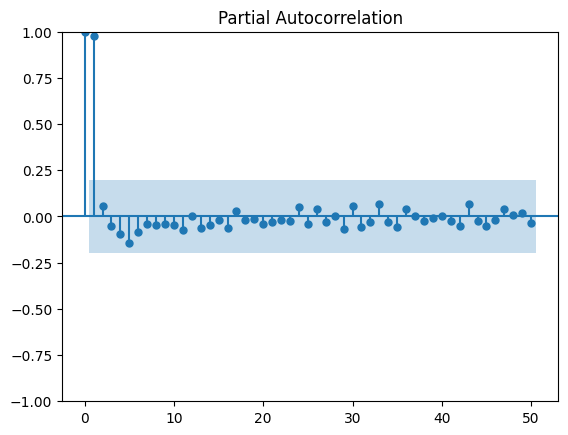

Lags for company = BetterTechnology


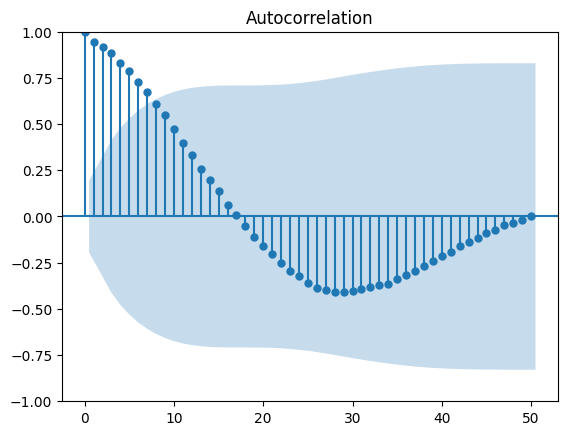

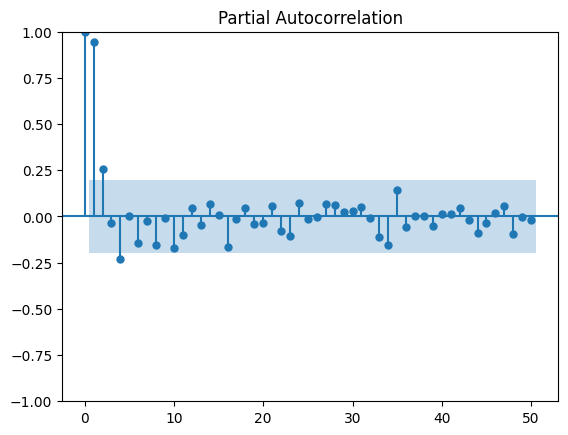

Lags for company = BetterTomorrow


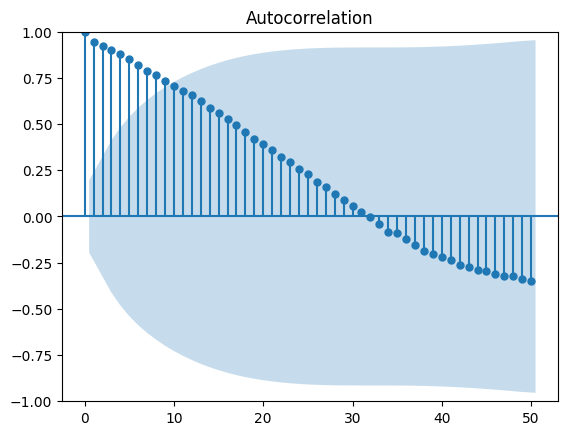

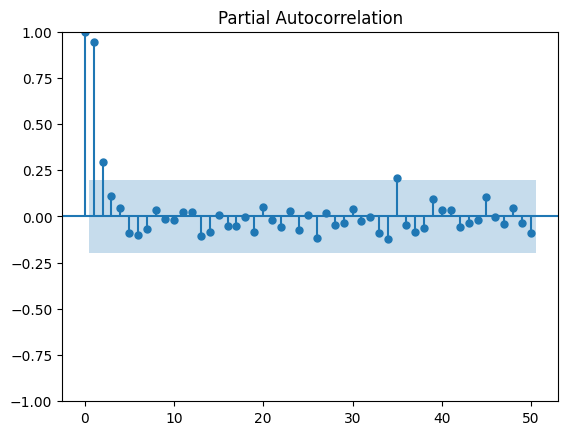

Lags for company = CPU-XYZ


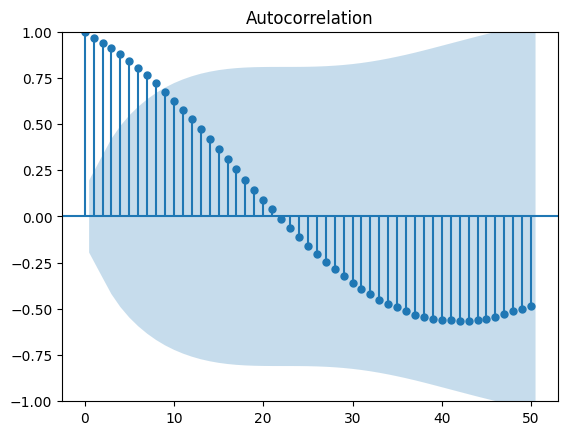

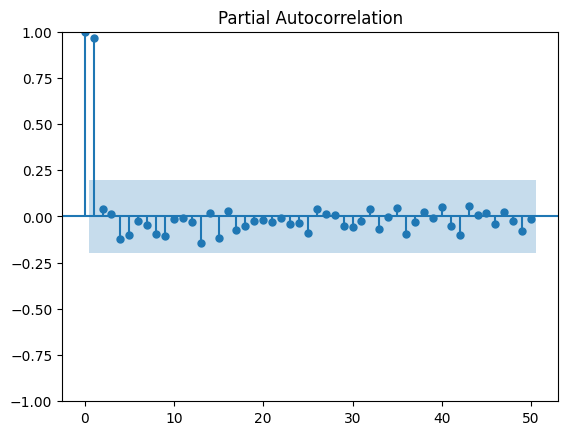

Lags for company = Electronics123


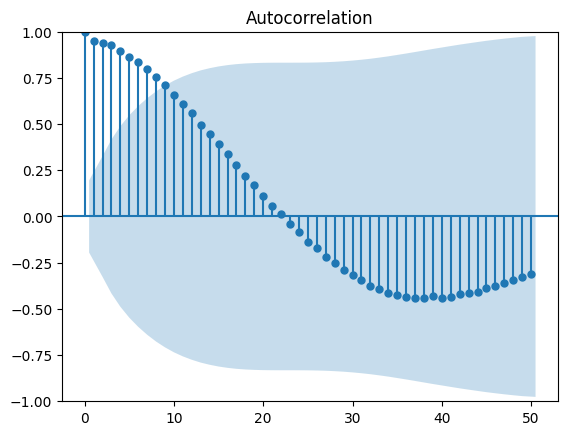

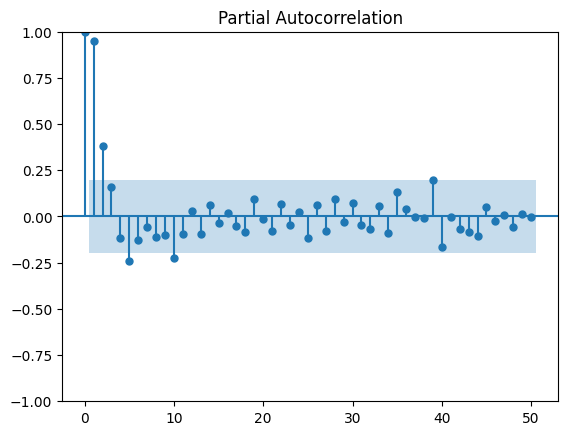

Lags for company = EnviroLike


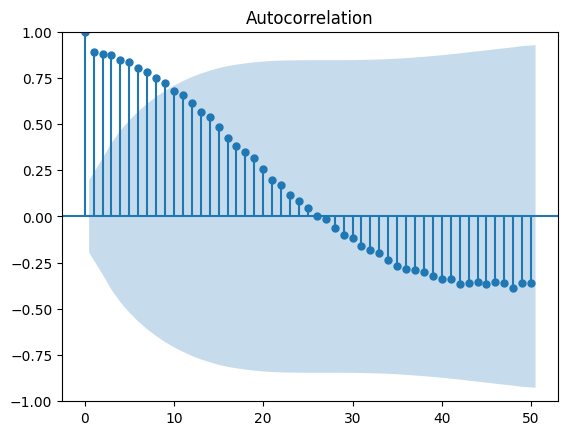

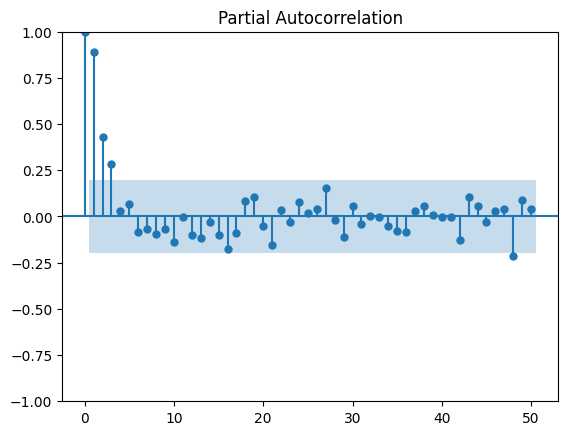

Lags for company = Fuel4


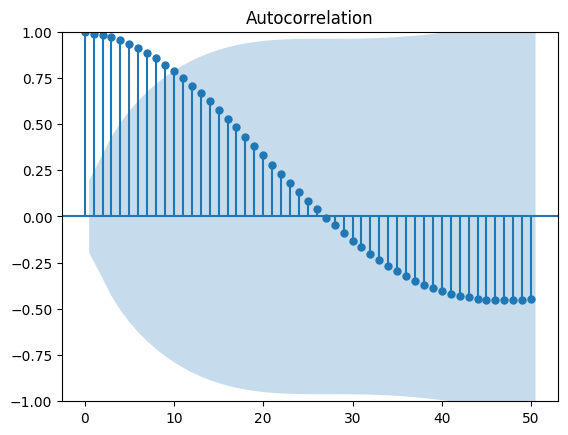

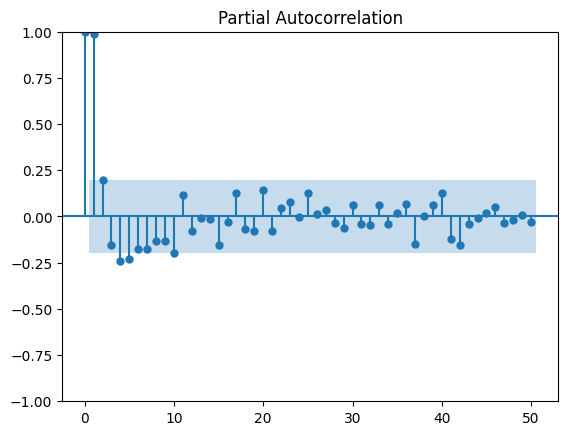

Lags for company = Lasers


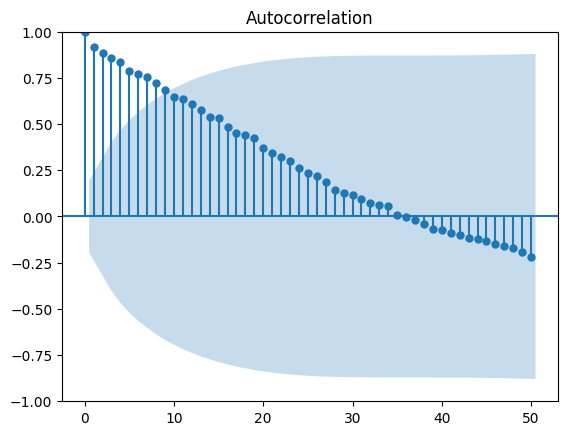

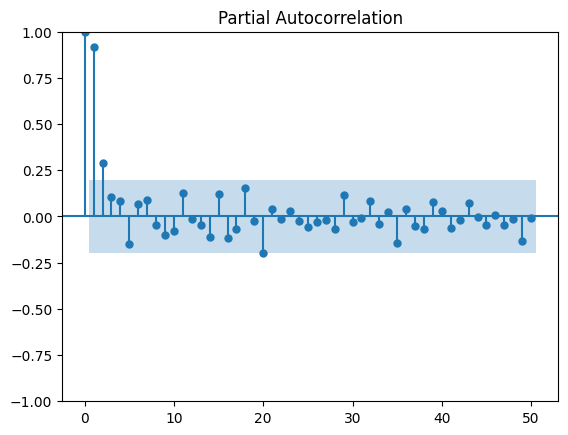

Lags for company = MarsProject


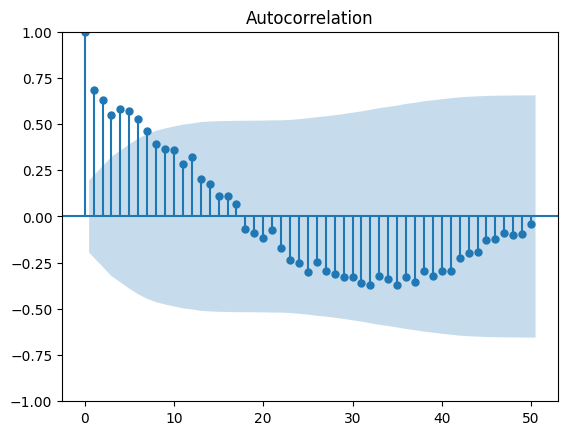

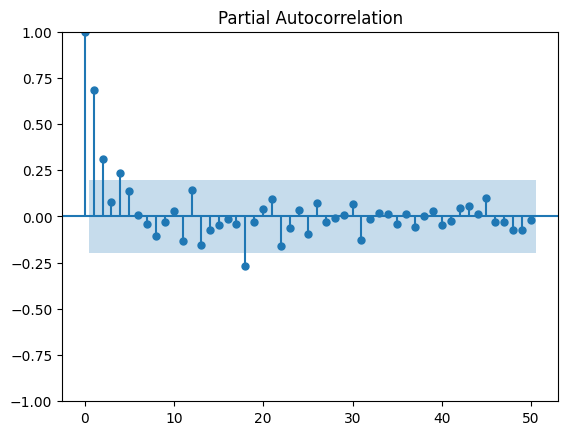

Lags for company = Moneymakers


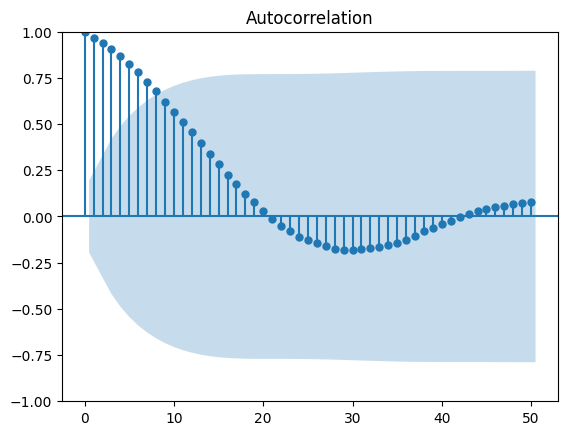

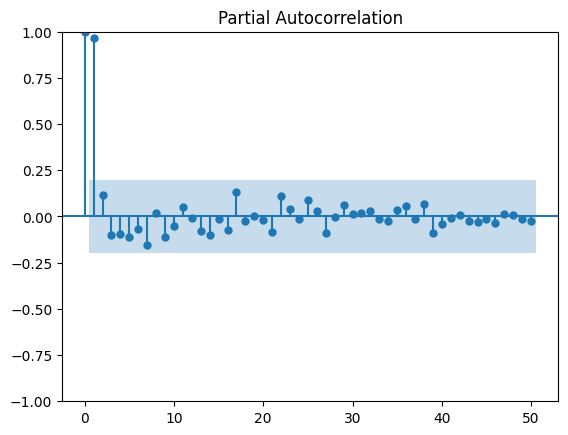

Lags for company = PearPear


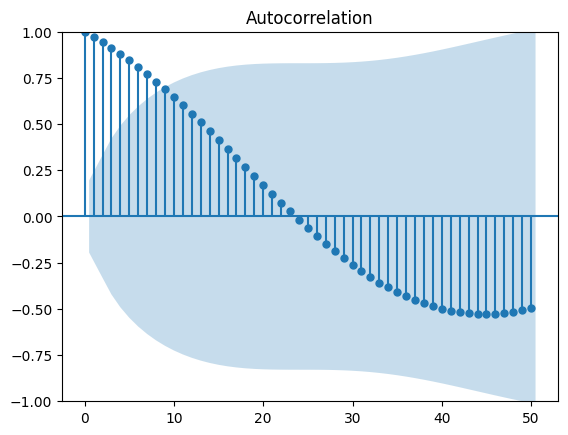

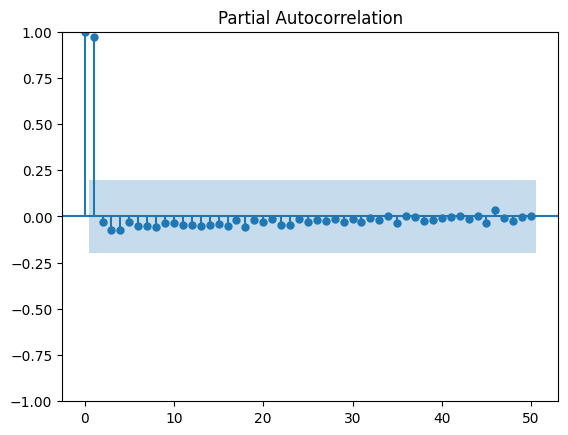

Lags for company = Photons


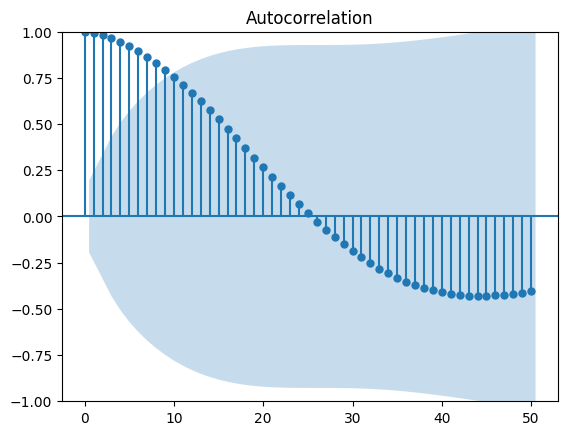

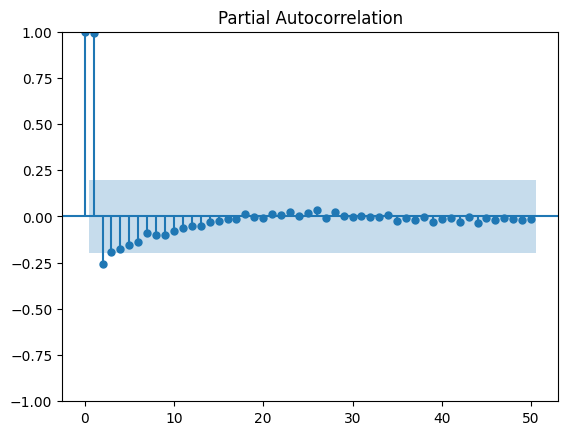

Lags for company = PositiveCorrelation


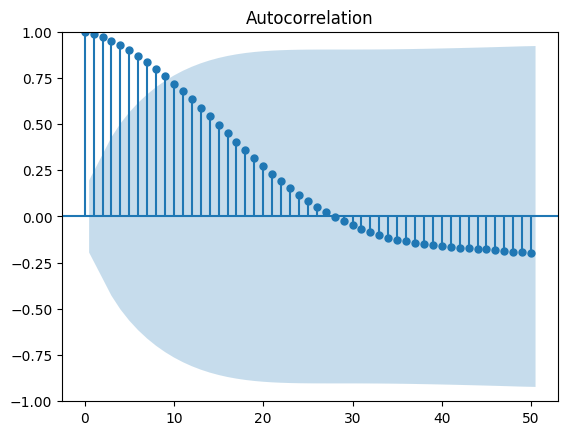

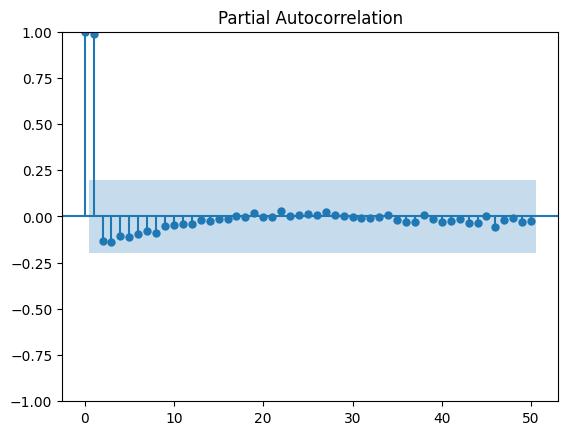

Lags for company = RoboticsX


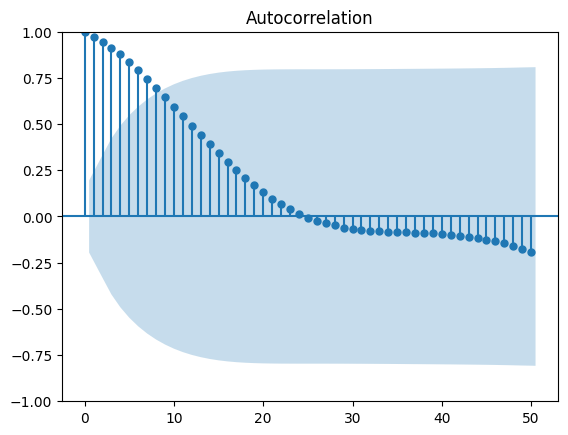

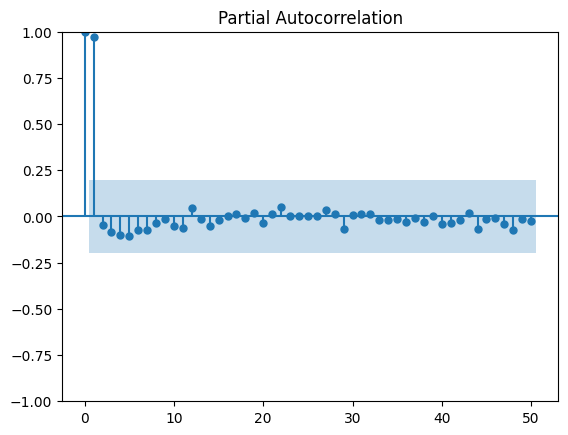

Lags for company = SafeAndCare


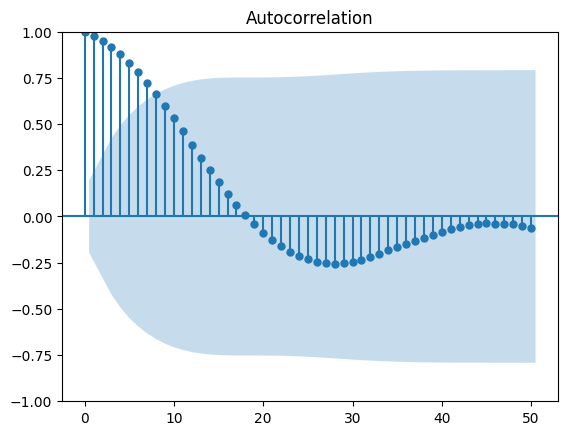

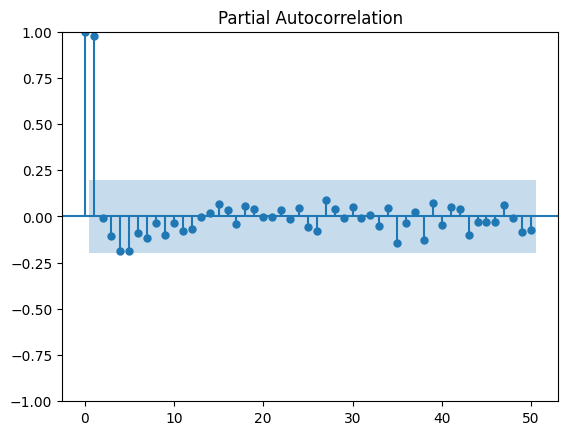

Lags for company = SpaceNow


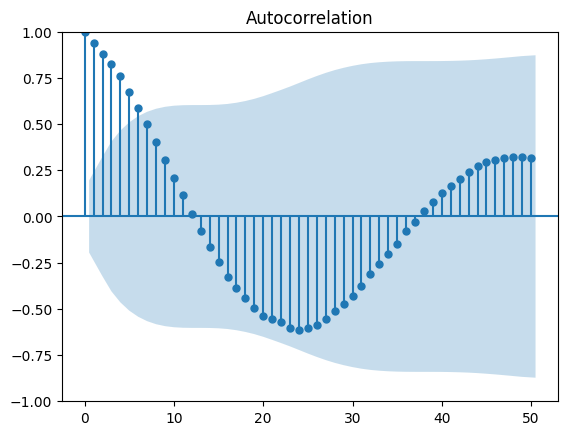

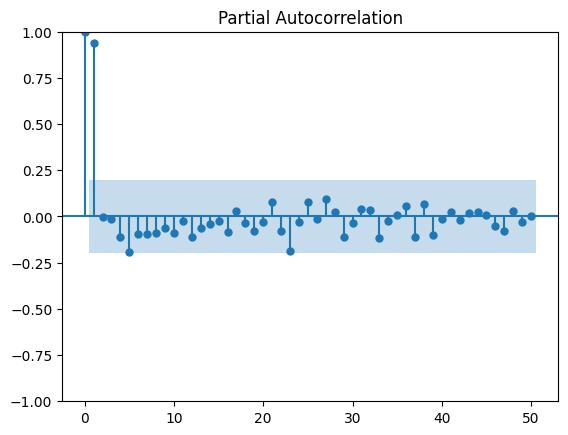

Lags for company = SuperFuture


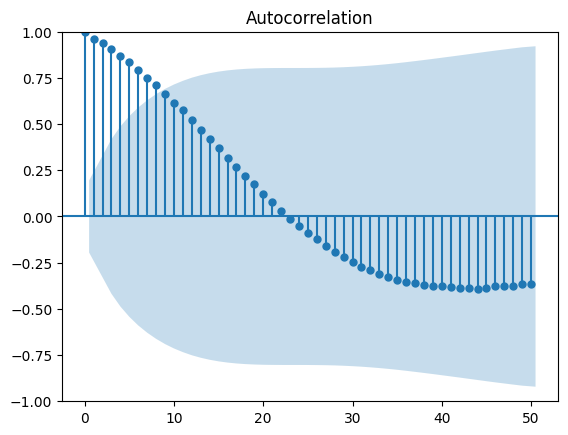

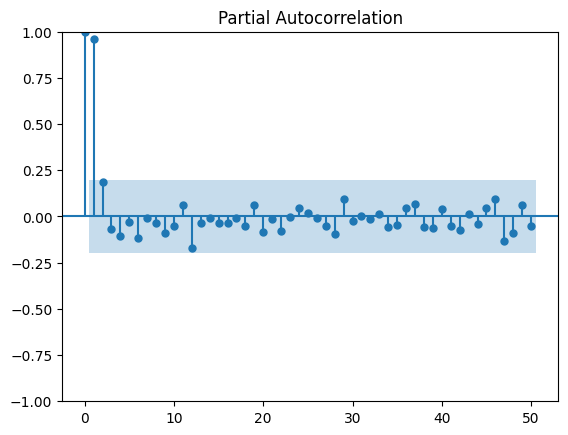

Lags for company = WaterForce


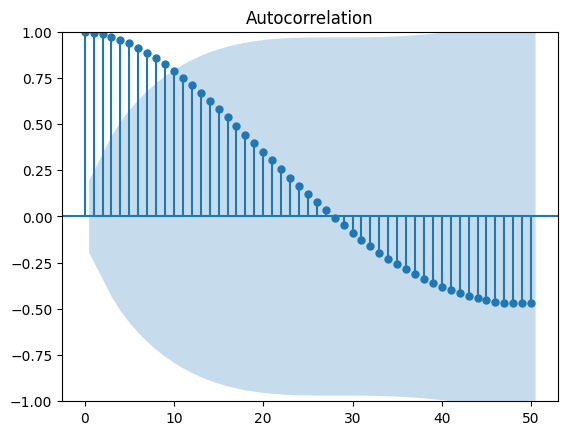

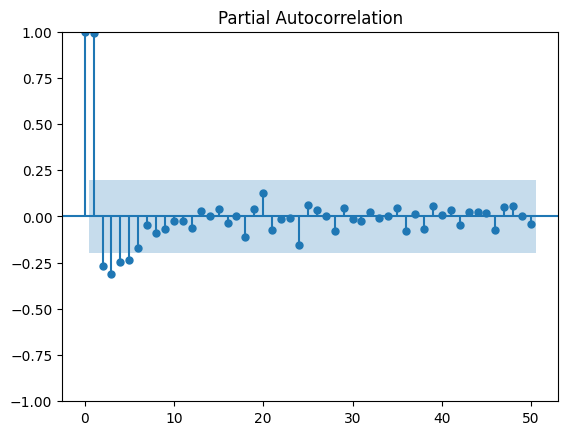

Lags for company = WorldNow


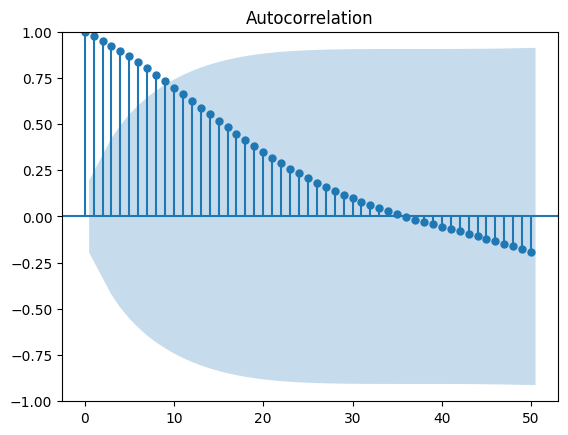

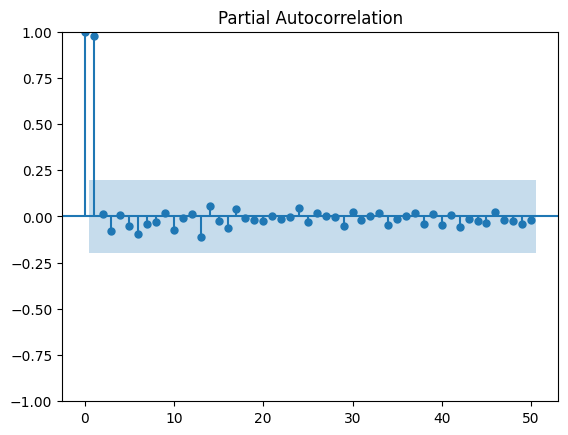

d:\MOO\MOO_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
d:\MOO\MOO_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
d:\MOO\MOO_env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


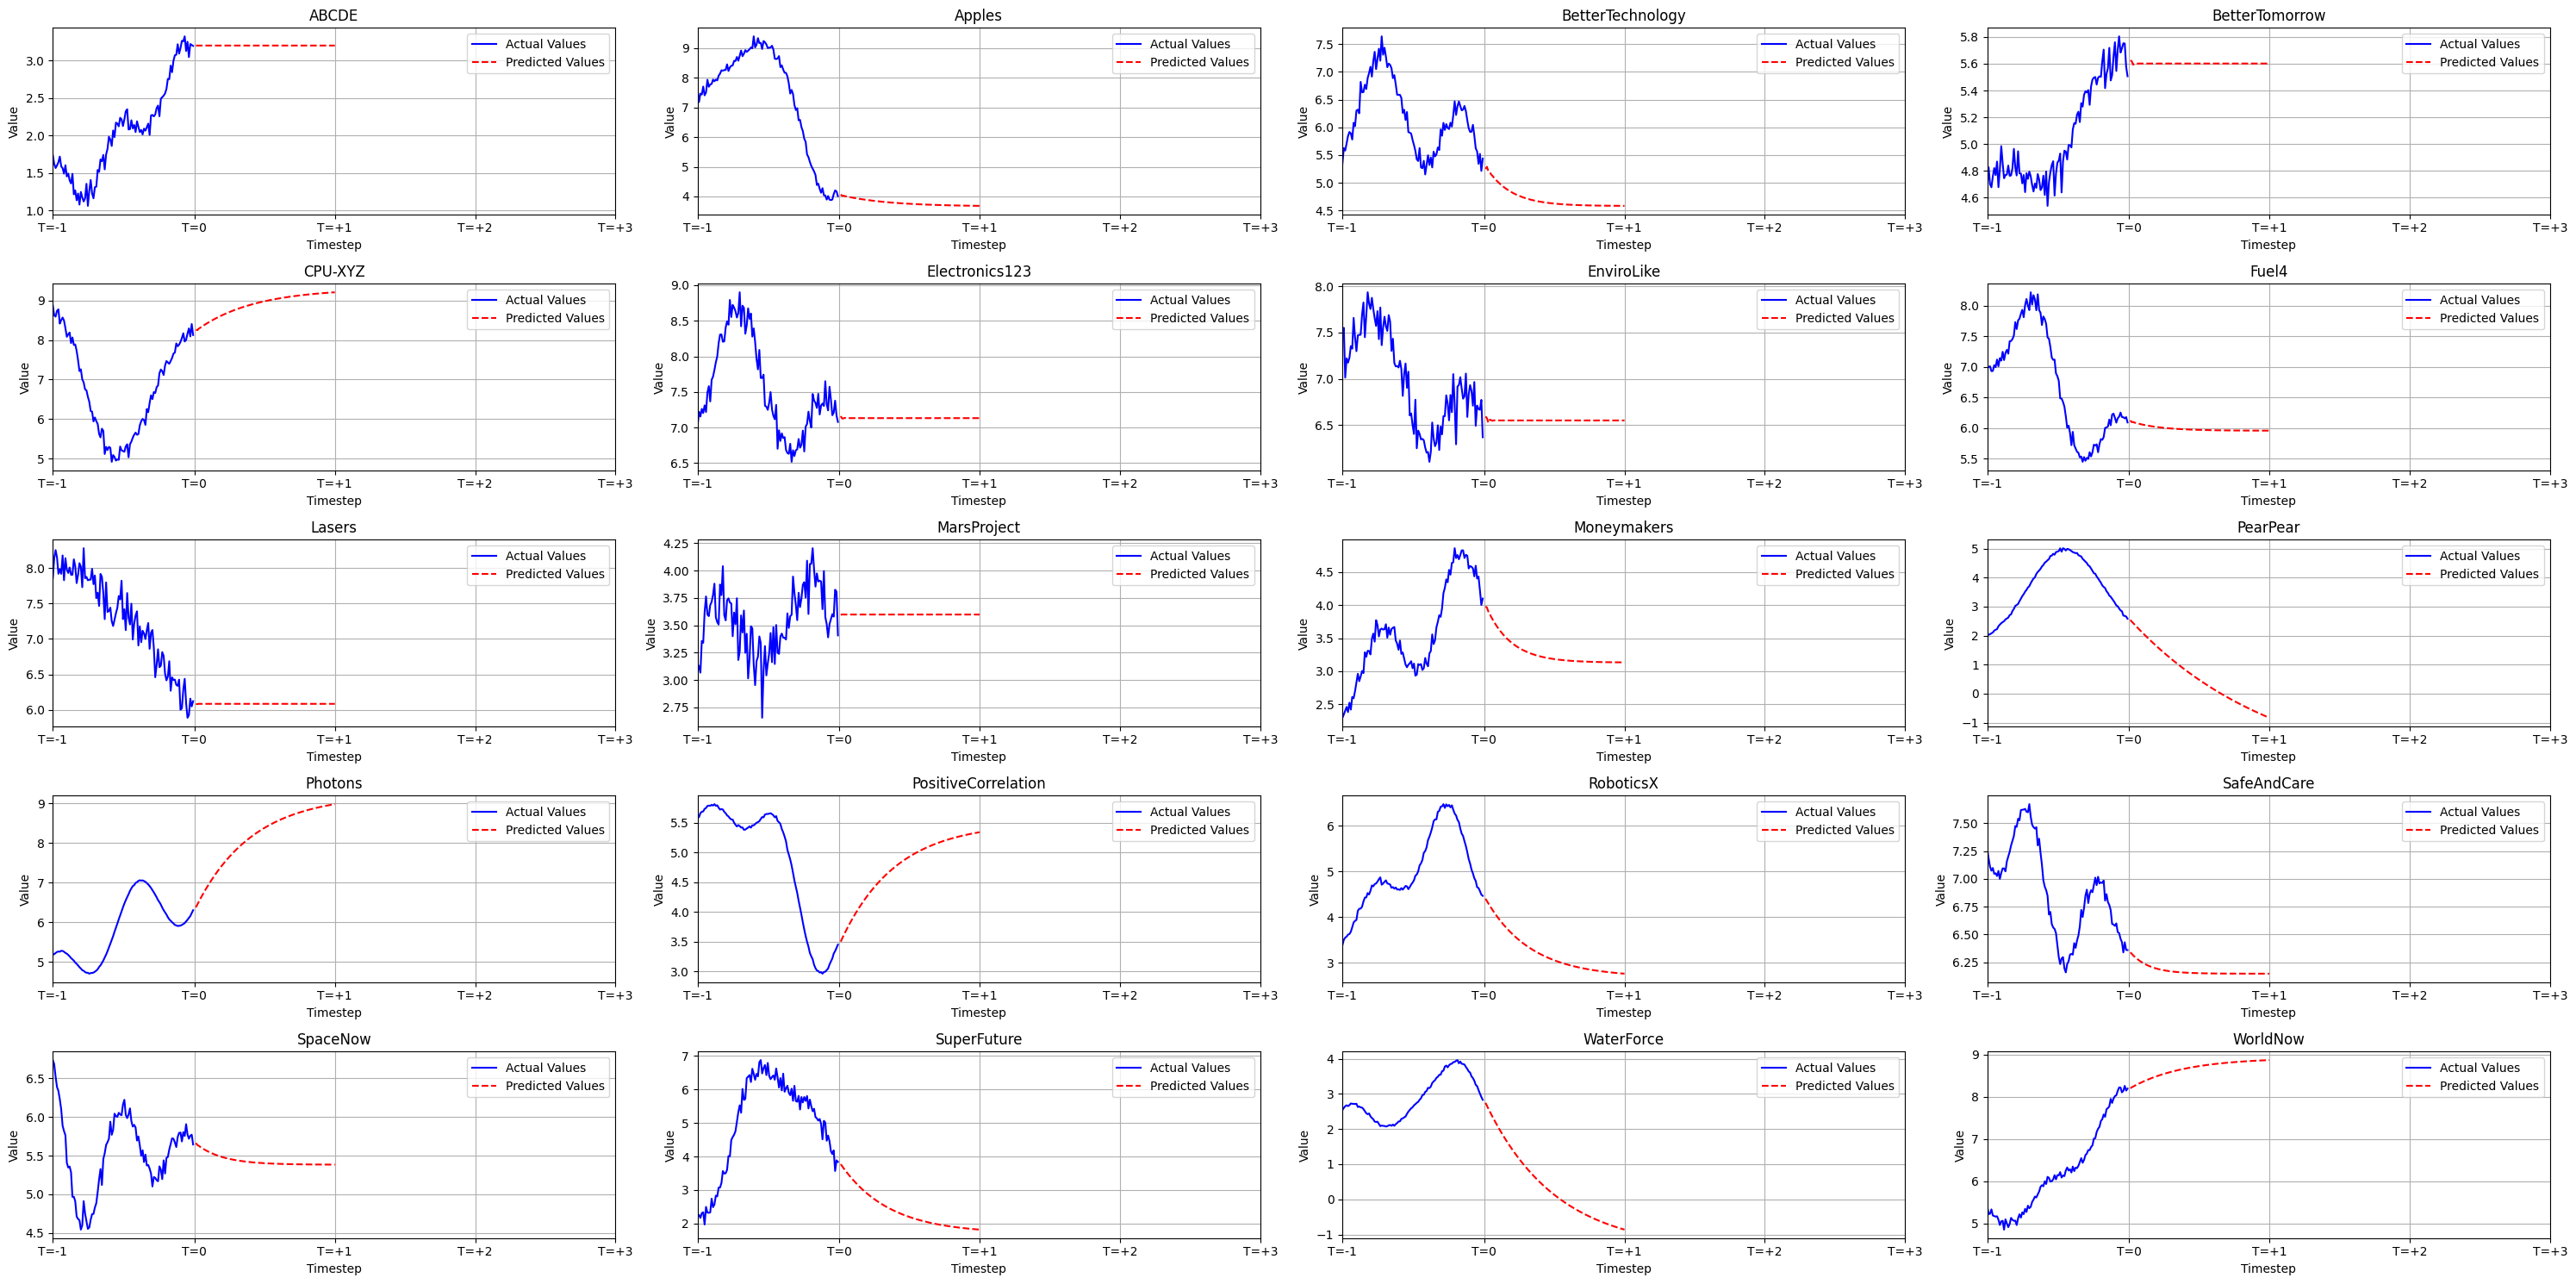

In [8]:
RMC = RegressionModelsCombined(data)
RMC.create_X_y(101)
RMC.plot_arima_lags(max_lags=50)
RMC.train_arima(p=2, d=1, q=1)
ARIMA_predictions = RMC.predict_arima()
RMC.plot_predictions(val_range=201, predictions=ARIMA_predictions, figsize=(30, 15))

### XGBoost

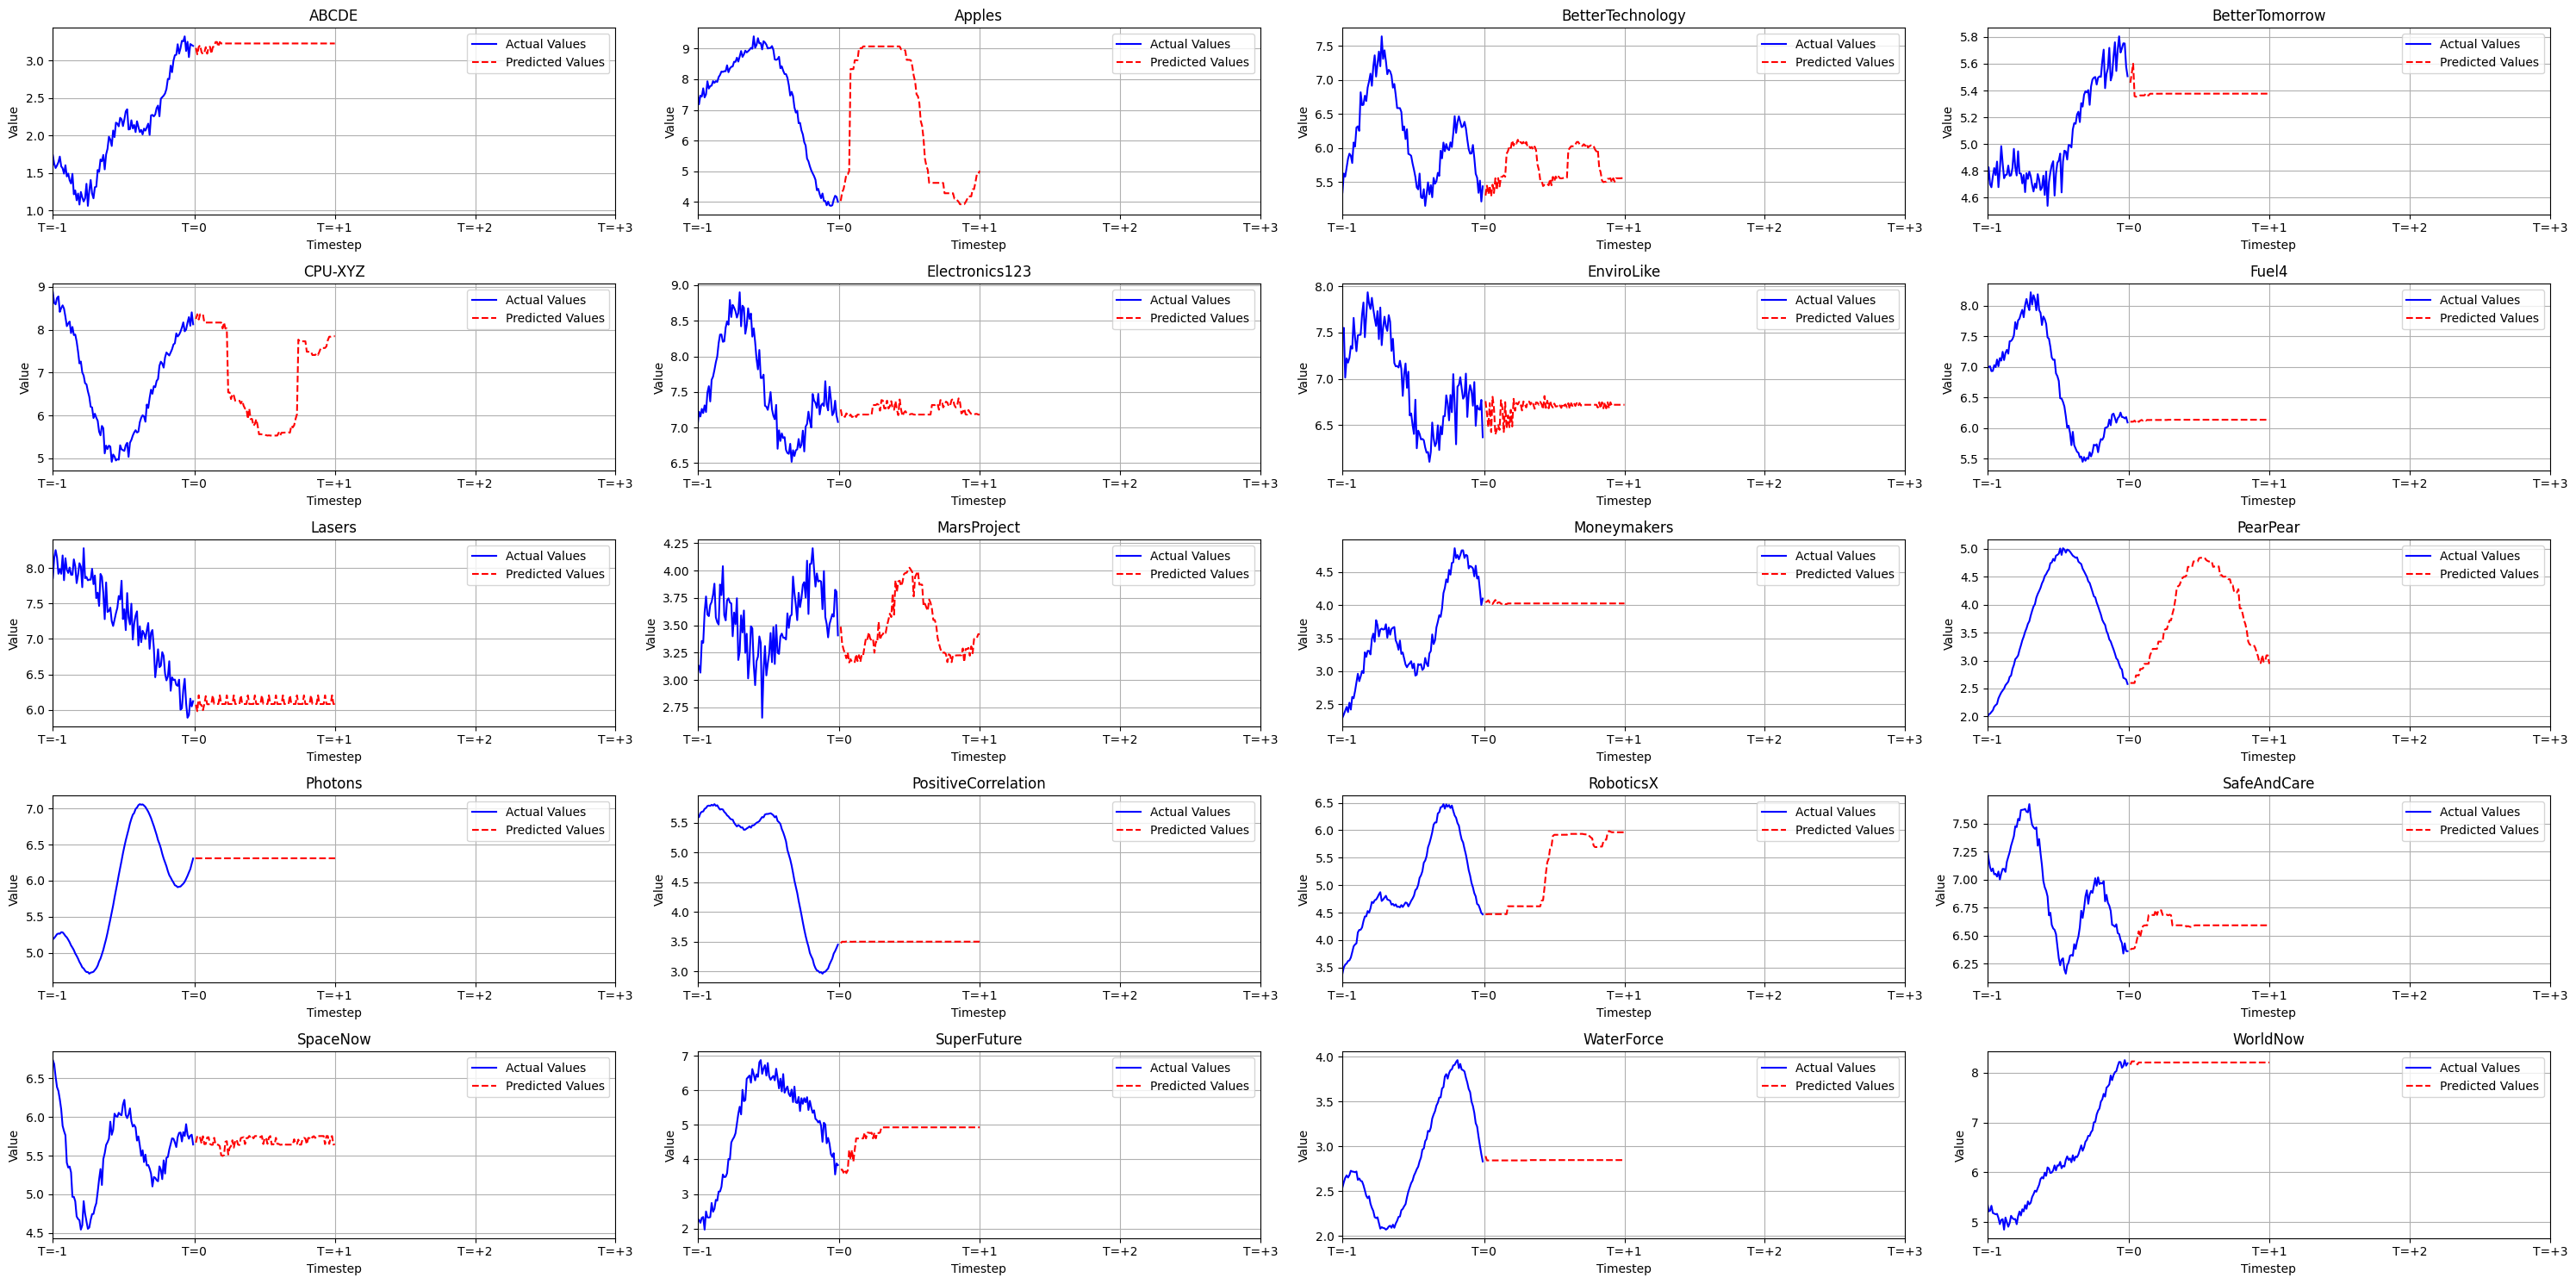

In [9]:
RMC = RegressionModelsCombined(data, window_size=50)
RMC.create_X_y_windows()
RMC.train_xgboost()
XGBoost_predictions = RMC.predict_xgboost()
RMC.plot_predictions(val_range=201, predictions=XGBoost_predictions, figsize=(30, 15))

### NODE

In [ ]:
RMC = RegressionModelsCombined(data, window_size=50)
RMC.train_NODE()
NODE_predictions = RMC.predict_NODE()
RMC.plot_predictions(val_range=201, predictions=NODE_predictions, figsize=(30, 15))

## Single-Run WSM Run

In [11]:
risks = RMC.get_covariance_matrix()
solver = Solver(data, XGBoost_predictions, risks)

     pcost       dcost       gap    pres   dres
 0:  2.3673e-03 -2.1485e+01  2e+01  2e-16  1e-15
 1:  2.0112e-03 -5.8263e-01  6e-01  1e-16  1e-15
 2:  8.6789e-04 -4.5988e-02  5e-02  1e-16  2e-16
 3:  3.5654e-04 -2.3546e-03  3e-03  2e-16  2e-16
 4:  2.2341e-04 -8.6686e-05  3e-04  1e-16  2e-16
 5:  1.8355e-04  1.4679e-04  4e-05  1e-16  1e-16
 6:  1.7698e-04  1.7532e-04  2e-06  1e-16  1e-16
 7:  1.7640e-04  1.7634e-04  6e-08  1e-16  2e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.6655e-01 -2.1847e+01  2e+01  2e-16  6e-16
 1: -1.8287e-01 -1.8945e+00  2e+00  2e-16  2e-15
 2: -2.2108e-01 -6.3720e-01  4e-01  2e-16  4e-16
 3: -3.2408e-01 -3.4566e-01  2e-02  2e-16  3e-16
 4: -3.3469e-01 -3.3497e-01  3e-04  2e-16  2e-16
 5: -3.3482e-01 -3.3482e-01  3e-06  1e-16  3e-16
 6: -3.3482e-01 -3.3482e-01  3e-08  2e-16  3e-16
Optimal solution found.


In [12]:
solutions = solver.solve_wsm()

Running for w1=0.0, w2=1.0
     pcost       dcost       gap    pres   dres
 0: -3.2373e-01 -2.2297e+01  8e+01  1e+00  8e-16
 1: -1.5935e-01 -7.3380e+00  7e+00  4e-16  2e-15
 2: -1.9999e-01 -1.4003e+00  1e+00  2e-16  8e-16
 3: -3.5092e-01 -1.0569e+00  7e-01  2e-16  5e-16
 4: -4.8020e-01 -5.1114e-01  3e-02  2e-16  5e-16
 5: -4.9366e-01 -4.9398e-01  3e-04  2e-16  5e-16
 6: -4.9380e-01 -4.9380e-01  3e-06  2e-16  4e-16
 7: -4.9380e-01 -4.9380e-01  3e-08  1e-16  4e-16
Optimal solution found.
Running for w1=0.1, w2=0.9
     pcost       dcost       gap    pres   dres
 0: -1.6415e-01 -2.1904e+01  2e+01  1e-15  1e-15
 1: -1.7806e-01 -2.2069e+00  2e+00  2e-16  2e-15
 2: -2.2961e-01 -5.4486e-01  3e-01  2e-16  7e-16
 3: -2.8871e-01 -3.1836e-01  3e-02  2e-16  3e-16
 4: -3.0063e-01 -3.0192e-01  1e-03  2e-16  4e-16
 5: -3.0113e-01 -3.0115e-01  1e-05  1e-16  2e-16
 6: -3.0114e-01 -3.0114e-01  1e-07  2e-16  4e-16
Optimal solution found.
Running for w1=0.2, w2=0.8
     pcost       dcost       gap    pres

In [13]:
pretty_display(solutions)

Expected Gain      Risk   SuperFuture        Apples      WorldNow  \
0        0.334819  0.678224  9.815939e-09  1.545108e-09  1.529296e-09   
1        0.299488  0.313664  1.532697e-08  2.058062e-01  1.201372e-08   
2        0.233046  0.109730  1.617639e-07  2.098453e-01  7.831777e-08   
3        0.192314  0.050094  1.050997e-07  1.540264e-01  1.146170e-08   
4        0.164565  0.024567  2.343206e-05  1.168401e-01  4.571126e-07   
5        0.144345  0.012619  1.505304e-06  1.286361e-01  5.648263e-02   
6        0.129075  0.006512  5.115658e-07  1.535926e-01  1.224258e-01   
7        0.118150  0.003642  1.759669e-09  1.711982e-01  1.676386e-01   
8        0.109831  0.002287  1.595097e-09  1.827557e-01  1.874371e-01   
9        0.093423  0.001068  7.255208e-08  1.195154e-01  1.848938e-01   
10       0.009096  0.000176  1.216349e-07  1.535186e-07  1.050560e-01   

    Electronics123       Photons      SpaceNow      PearPear  \
0     1.633152e-09  1.513178e-09  1.521111e-09  3.175691e-09   
1     3.205530e-08  7.891927e-09  1.506932e-08  9.904681e-09   
2     1.863516e-07  1.035220e-08  2.204164e-07  1.655375e-08   
3     4.486641e-09  1.434003e-09  5.828638e-02  1.932267e-09   
4     7.762301e-09  2.189553e-09  1.340917e-01  2.850835e-09   
5     3.235636e-10  6.973138e-11  1.313242e-01  9.610774e-11   
6     5.997373e-09  8.047383e-10  1.052837e-01  1.209265e-09   
7     1.135015e-09  1.873689e-10  8.610115e-02  2.301483e-10   
8     8.786715e-08  1.630711e-10  6.736568e-02  2.297534e-10   
9     7.326317e-03  4.917685e-09  6.237760e-02  1.004501e-08   
10    2.654319e-02  1.288396e-01  1.982465e-02  5.605085e-07   

    PositiveCorrelation  ...   Moneymakers         Fuel4   MarsProject  \
0          1.630743e-09  ...  1.381160e-09  1.570691e-09  1.540034e-09   
1          1.422995e-08  ...  1.031651e-08  8.004807e-08  1.169792e-08   
2          2.140260e-08  ...  2.047361e-08  2.810042e-02  1.822309e-08   
3          2.476759e-09  ...  1.501757e-09  1.176664e-01  1.860851e-09   
4          3.497766e-09  ...  1.974045e-09  1.586262e-01  2.414659e-09   
5          1.239202e-10  ...  6.863868e-11  1.594391e-01  8.324062e-11   
6          1.563171e-09  ...  8.109379e-10  1.480612e-01  1.002419e-09   
7          4.028559e-10  ...  1.640039e-10  1.399723e-01  2.154566e-10   
8          1.363292e-09  ...  1.379576e-10  1.341908e-01  2.407701e-10   
9          8.656537e-02  ...  6.015844e-09  1.272383e-01  1.255652e-08   
10         1.836117e-01  ...  4.183457e-02  8.228063e-02  7.125858e-03   

         CPU-XYZ  RoboticsX        Lasers    WaterForce   SafeAndCare  \
0   1.276098e-09   1.000000  1.463610e-09  1.556865e-09  1.833982e-09   
1   4.979236e-02   0.744401  1.338403e-08  9.329834e-09  1.866020e-08   
2   2.039858e-01   0.558067  1.986384e-08  1.219939e-08  3.739418e-08   
3   1.945754e-01   0.475445  1.918780e-09  1.510950e-09  2.395977e-09   
4   1.731280e-01   0.417290  2.160799e-09  1.835975e-09  2.499702e-09   
5   1.761384e-01   0.347978  8.003230e-11  6.361283e-11  9.358707e-11   
6   1.861316e-01   0.284499  1.003626e-09  7.623480e-10  1.038497e-09   
7   1.930824e-01   0.239179  2.198453e-10  1.599430e-10  2.361857e-10   
8   1.968962e-01   0.205358  3.155147e-10  1.655276e-10  1.772926e-10   
9   1.616849e-01   0.193748  2.538906e-08  7.219250e-09  7.855439e-09   
10  4.360188e-02   0.001878  8.506487e-07  8.033614e-02  1.478802e-01   

    BetterTomorrow  Sanity Check  
0     1.343561e-09           1.0  
1     1.065870e-08           1.0  
2     2.040394e-08           1.0  
3     1.989547e-09           1.0  
4     2.888304e-09           1.0  
5     9.795058e-11           1.0  
6     1.176970e-09           1.0  
7     2.672556e-10           1.0  
8     3.411503e-10           1.0  
9     2.286261e-08           1.0  
10    3.842622e-02           1.0  

[11 rows x 23 columns]

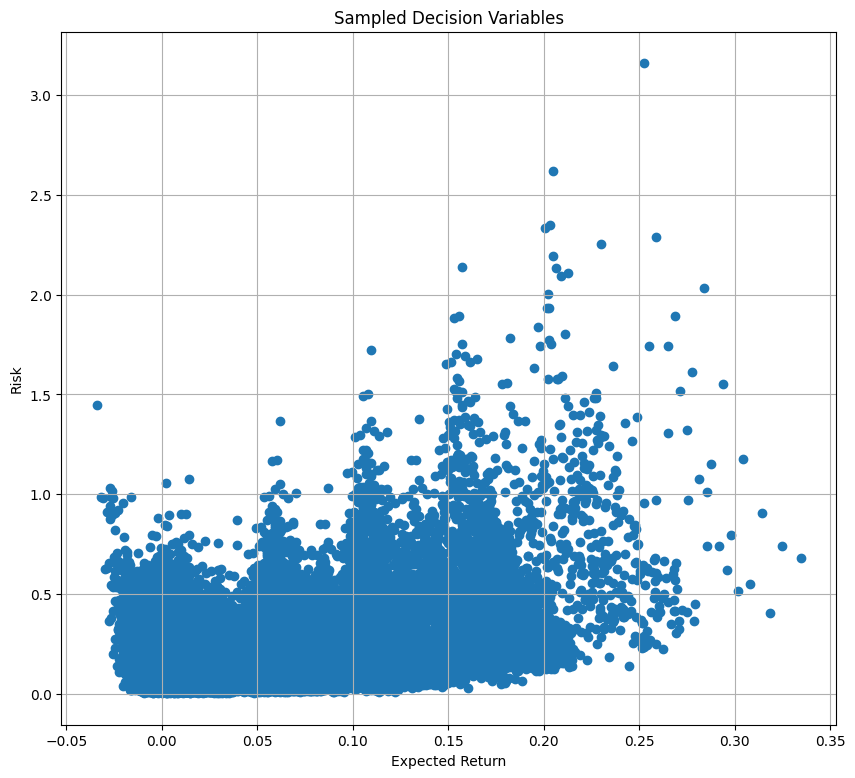

In [14]:
solver.plot_sampled_decision_variables(20, 0.2)

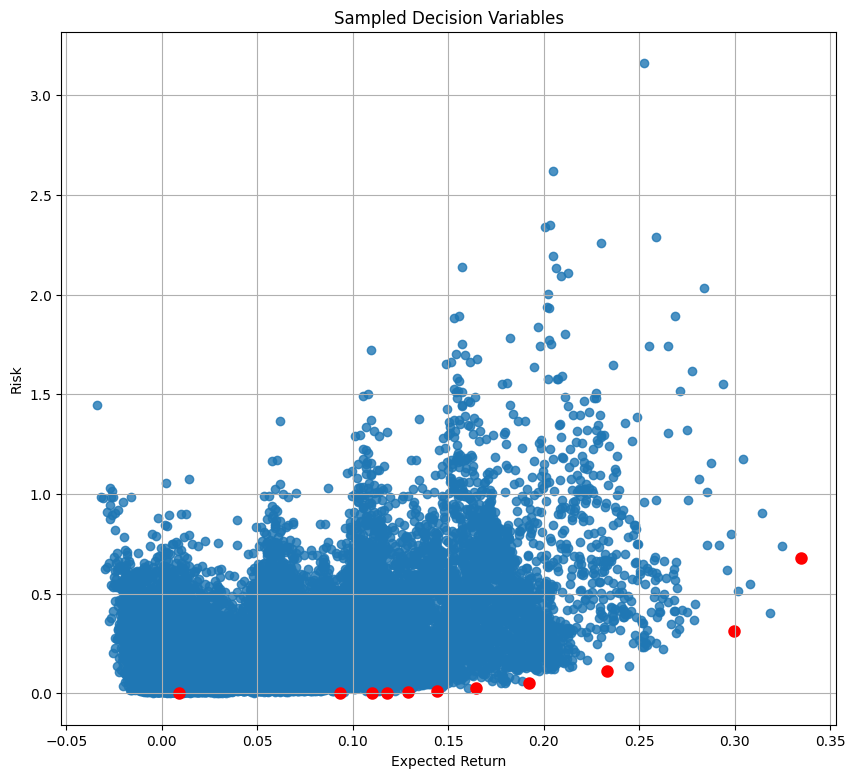

In [15]:
solver.plot_front(solutions, n=20, step=0.2)

### Single-Run ECM Algorithm

In [16]:
solutions = solver.solve_ecm()

Running for threshold=0.009384687021655137
     pcost       dcost       gap    pres   dres
 0:  2.2503e-03 -2.1558e+01  2e+01  2e-16  1e+00
 1:  1.9516e-03 -5.5663e-01  6e-01  2e-16  3e-02
 2:  8.5515e-04 -4.3069e-02  4e-02  2e-16  2e-03
 3:  3.5436e-04 -2.3059e-03  3e-03  2e-16  9e-17
 4:  2.2518e-04 -9.6731e-05  3e-04  4e-16  1e-16
 5:  1.8398e-04  1.4899e-04  3e-05  2e-16  1e-16
 6:  1.7706e-04  1.7531e-04  2e-06  2e-16  1e-16
 7:  1.7643e-04  1.7635e-04  8e-08  1e-16  2e-16
Optimal solution found.
Running for threshold=0.04192812416015212
     pcost       dcost       gap    pres   dres
 0:  2.3851e-03 -2.1475e+01  8e+01  1e+00  1e+00
 1:  2.4306e-02 -7.0085e+00  7e+00  3e-16  2e-15
 2:  1.3108e-02 -7.3984e-01  8e-01  2e-16  2e-15
 3:  2.8642e-03 -3.9790e-02  4e-02  4e-16  3e-16
 4:  9.1026e-04 -7.2440e-03  8e-03  2e-16  1e-16
 5:  4.0221e-04 -1.1807e-03  2e-03  1e-16  2e-16
 6:  2.6436e-04  2.2606e-05  2e-04  2e-16  2e-16
 7:  2.2900e-04  1.9133e-04  4e-05  1e-16  2e-16
 8:  2.1929

In [17]:
pretty_display(solutions)

Expected Gain      Risk   SuperFuture        Apples      WorldNow  \
0        0.009930  0.000176  1.738053e-06  1.164610e-06  1.060503e-01   
1        0.041929  0.000219  1.704523e-06  7.381201e-07  1.441527e-01   
2        0.074472  0.000425  2.446775e-08  9.291893e-03  1.633337e-01   
3        0.107015  0.001990  2.349225e-09  1.866611e-01  1.944761e-01   
4        0.139558  0.010442  1.679572e-07  1.364584e-01  7.715294e-02   
5        0.172102  0.030402  9.481217e-07  1.269352e-01  1.519353e-07   
6        0.204645  0.064999  1.010843e-08  1.705539e-01  5.060612e-09   
7        0.237189  0.117902  3.480145e-08  2.156599e-01  1.763352e-08   
8        0.269732  0.201901  5.079256e-10  2.147851e-01  3.450294e-10   
9        0.302276  0.325852  3.389943e-10  2.049653e-01  1.572297e-10   
10       0.334819  0.678223  1.209895e-09  1.196332e-07  4.493674e-10   

    Electronics123       Photons      SpaceNow      PearPear  \
0     2.613468e-02  1.258610e-01  2.047973e-02  5.730757e-06   
1     1.051388e-02  1.153622e-02  4.557654e-02  1.712195e-06   
2     9.189235e-03  1.694647e-08  6.589463e-02  1.407308e-08   
3     2.368270e-05  1.728179e-09  6.119395e-02  1.467683e-09   
4     1.702101e-09  3.197997e-10  1.231630e-01  4.334685e-10   
5     1.496705e-08  3.491252e-09  1.135169e-01  4.331845e-09   
6     4.652788e-09  1.087830e-09  2.459197e-02  1.511498e-09   
7     3.814532e-08  4.004530e-09  3.562762e-08  6.558132e-09   
8     7.334681e-10  1.315175e-10  4.879596e-10  1.884977e-10   
9     4.111565e-10  9.507212e-11  2.910773e-10  1.717198e-10   
10    5.385054e-10  3.853082e-10  5.402075e-10  8.096881e-10   

    PositiveCorrelation  ...   Moneymakers         Fuel4   MarsProject  \
0          1.851669e-01  ...  4.142177e-02  8.200423e-02  7.023983e-03   
1          2.451476e-01  ...  2.549535e-02  7.145891e-02  3.024997e-03   
2          2.246320e-01  ...  3.866371e-08  1.353766e-01  3.555037e-08   
3          1.024762e-07  ...  8.909918e-10  1.312210e-01  1.610389e-09   
4          5.949181e-10  ...  3.092964e-10  1.558732e-01  3.970273e-10   
5          6.221524e-09  ...  3.349110e-09  1.475107e-01  4.316625e-09   
6          1.954457e-09  ...  1.248107e-09  9.945921e-02  1.515674e-09   
7          7.964966e-09  ...  6.101735e-09  1.570062e-02  6.738070e-09   
8          2.450832e-10  ...  1.942246e-10  2.211168e-09  2.254238e-10   
9          3.286694e-10  ...  1.231321e-10  4.251133e-10  1.856335e-10   
10         6.052070e-10  ...  3.958639e-10  3.822525e-10  5.174093e-10   

         CPU-XYZ  RoboticsX        Lasers    WaterForce   SafeAndCare  \
0   4.412995e-02   0.004569  1.061958e-05  7.903866e-02  1.463160e-01   
1   6.420085e-02   0.107921  3.307927e-06  2.954809e-02  8.658028e-02   
2   1.051380e-01   0.205932  4.510621e-07  2.851912e-08  1.318895e-05   
3   1.977941e-01   0.193640  2.275724e-09  1.002708e-09  1.355062e-09   
4   1.792698e-01   0.328082  3.937041e-10  3.075246e-10  4.431103e-10   
5   1.789360e-01   0.433100  4.012234e-09  3.176861e-09  4.696561e-09   
6   2.041168e-01   0.501278  1.597417e-09  1.221535e-09  2.114695e-09   
7   2.024712e-01   0.566168  6.942314e-09  4.878059e-09  1.171439e-08   
8   1.284205e-01   0.656794  2.293876e-10  1.716539e-10  3.261957e-10   
9   4.242677e-02   0.752608  2.645510e-10  1.242997e-10  3.312471e-10   
10  8.675132e-10   1.000000  5.397210e-10  4.517172e-10  6.564153e-10   

    BetterTomorrow  Sanity Check  
0     3.878380e-02           1.0  
1     5.243522e-02           1.0  
2     4.248168e-06           1.0  
3     2.918738e-09           1.0  
4     4.538465e-10           1.0  
5     4.849827e-09           1.0  
6     1.587055e-09           1.0  
7     6.974642e-09           1.0  
8     2.173563e-10           1.0  
9     1.495244e-10           1.0  
10    4.304610e-10           1.0  

[11 rows x 23 columns]

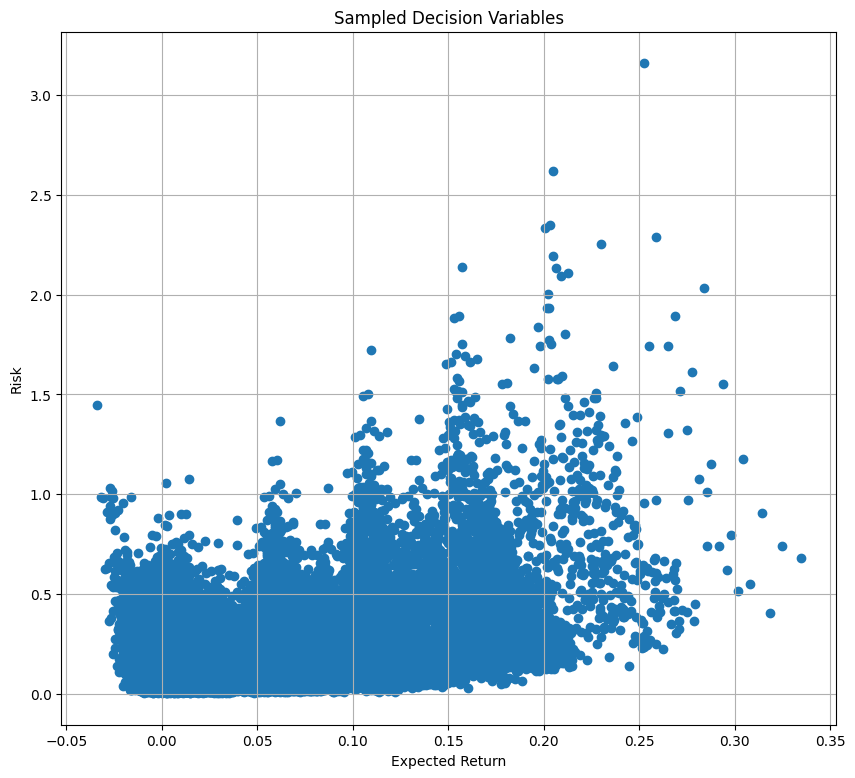

In [18]:
solver.plot_sampled_decision_variables(20, 0.2)

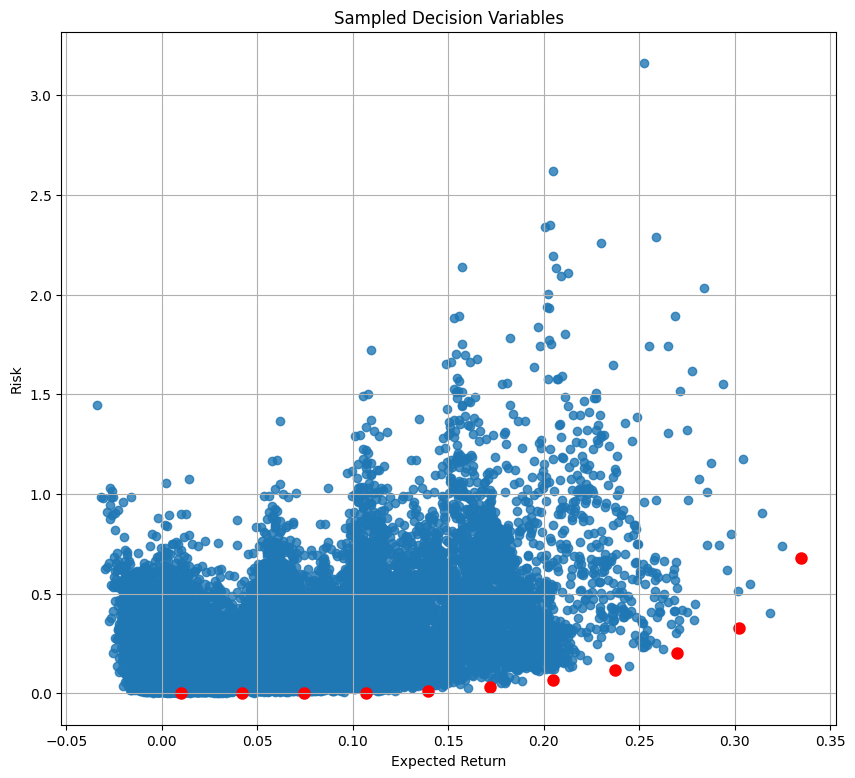

In [19]:
solver.plot_front(solutions, n=20, step=0.2)

## Comparison

### Single Threshold/Step Tests

In [20]:
thresholds = [20]
steps = [1/20]

ER = ExperimentRunner(solver=solver)
ER.run_ECM(thresholds)
ER.run_WSM(steps)

Running for threshold=0.009384687021655137
     pcost       dcost       gap    pres   dres
 0:  2.2503e-03 -2.1558e+01  2e+01  2e-16  1e+00
 1:  1.9516e-03 -5.5663e-01  6e-01  2e-16  3e-02
 2:  8.5515e-04 -4.3069e-02  4e-02  2e-16  2e-03
 3:  3.5436e-04 -2.3059e-03  3e-03  2e-16  9e-17
 4:  2.2518e-04 -9.6731e-05  3e-04  4e-16  1e-16
 5:  1.8398e-04  1.4899e-04  3e-05  2e-16  1e-16
 6:  1.7706e-04  1.7531e-04  2e-06  2e-16  1e-16
 7:  1.7643e-04  1.7635e-04  8e-08  1e-16  2e-16
Optimal solution found.
Running for threshold=0.026512811831390384
     pcost       dcost       gap    pres   dres
 0:  2.3198e-03 -2.1515e+01  2e+01  2e-15  1e+00
 1:  2.0199e-03 -5.6491e-01  6e-01  2e-16  3e-02
 2:  8.9304e-04 -4.3122e-02  4e-02  2e-16  2e-03
 3:  3.7521e-04 -3.1728e-03  4e-03  1e-16  1e-16
 4:  2.4781e-04 -9.7375e-05  3e-04  2e-16  1e-16
 5:  2.0121e-04  1.4405e-04  6e-05  1e-16  1e-16
 6:  1.8930e-04  1.8698e-04  2e-06  2e-16  1e-16
 7:  1.8847e-04  1.8843e-04  4e-08  2e-16  1e-16
Optimal so

In [21]:
top_ecm, top_wsm = ER.summarize()
top_wsm

Solution Signature  Frequency Method
0  (9.815938612234397e-09, 1.5451078179295476e-09...          1    WSM
1  (1.4774799115841881e-09, 0.1652771202012482, 1...          1    WSM
2  (1.5326967643371123e-08, 0.20580624735726724, ...          1    WSM
3  (4.3410373152676596e-08, 0.2185475794631434, 3...          1    WSM
4  (1.61763911140918e-07, 0.20984530049383288, 7....          1    WSM
5  (4.098825567045744e-09, 0.18330810819399038, 2...          1    WSM
6  (1.0509970006873698e-07, 0.15402640875838855, ...          1    WSM
7  (5.615834005367776e-07, 0.1327736831979198, 3....          1    WSM
8  (2.343205522449797e-05, 0.11684010464824372, 4...          1    WSM
9  (0.002781078669034648, 0.11195376364974587, 0....          1    WSM

In [22]:
top_ecm

Solution Signature  Frequency Method
0  (1.7380525853781028e-06, 1.1646101982033194e-0...          1    ECM
1  (2.425249290532235e-06, 1.894443281014986e-06,...          1    ECM
2  (1.8395919813151678e-06, 7.808773070743494e-07...          1    ECM
3  (2.337720201969942e-08, 1.4375249714861785e-08...          1    ECM
4  (9.531950937695953e-07, 0.029217595193837917, ...          1    ECM
5  (9.87810890732594e-09, 0.12882905709205147, 0....          1    ECM
6  (1.2859235759425636e-08, 0.17952993719700253, ...          1    ECM
7  (1.8607112582144196e-06, 0.15325126258471142, ...          1    ECM
8  (2.227743502920204e-06, 0.12526088278907316, 0...          1    ECM
9  (7.218965076420635e-06, 0.11545975296060017, 1...          1    ECM

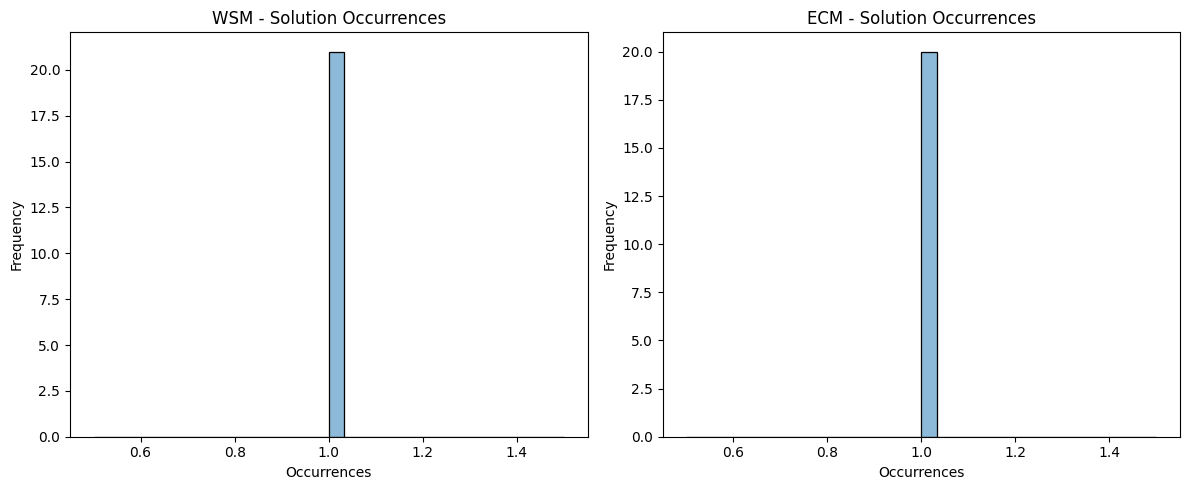

In [23]:
ER.plot_results()

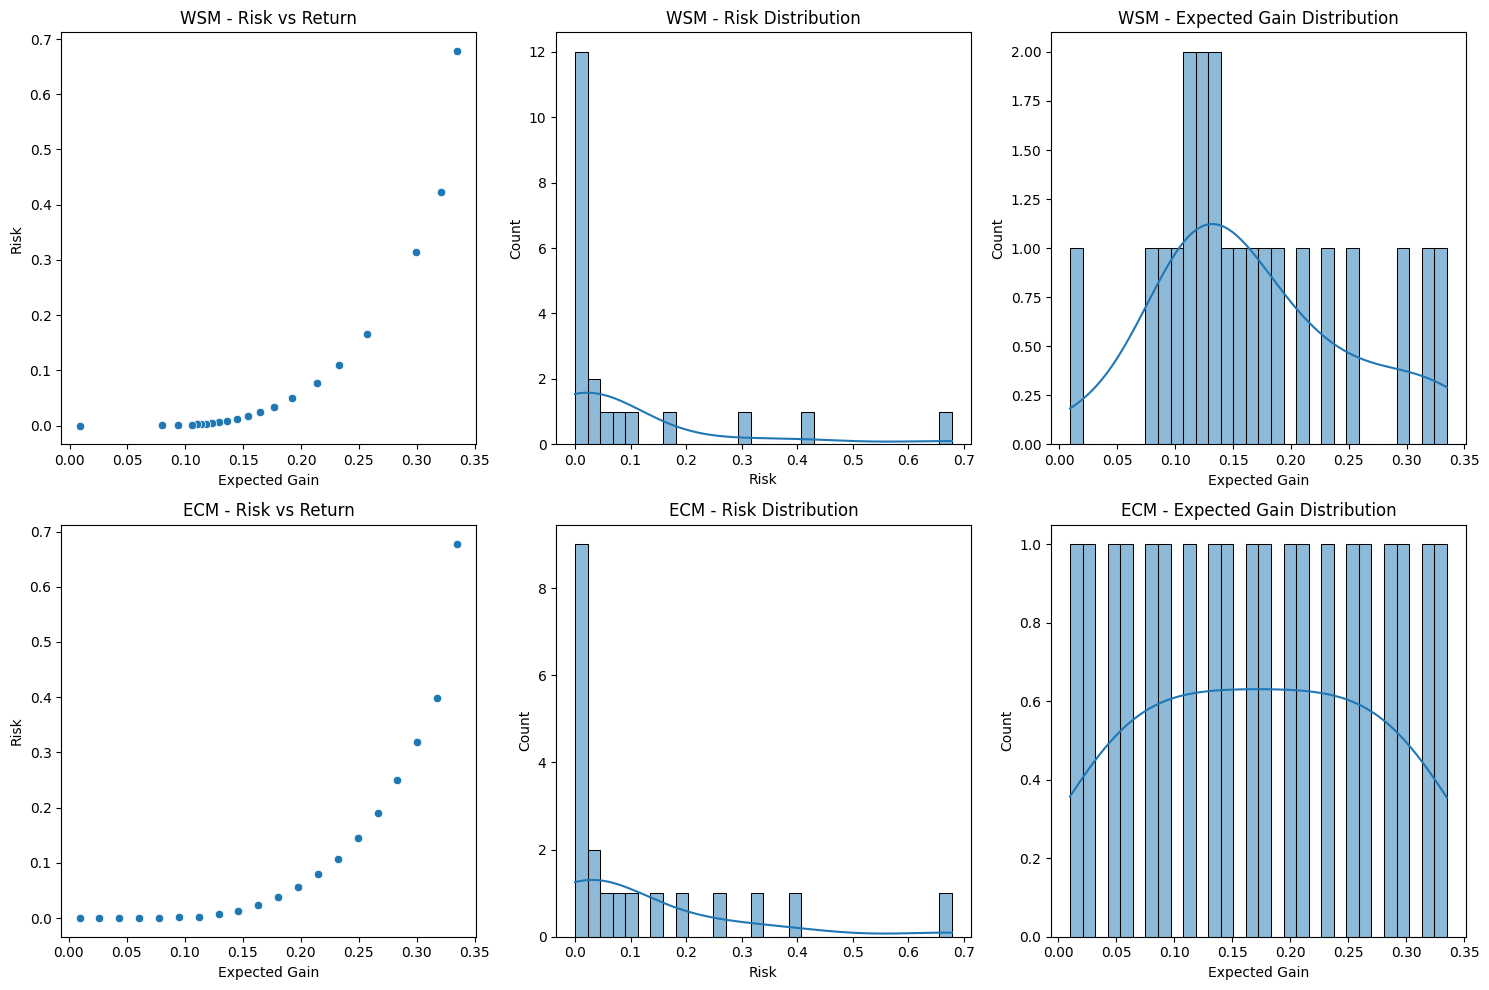

In [24]:
ER.plot_risk_return_distribution()

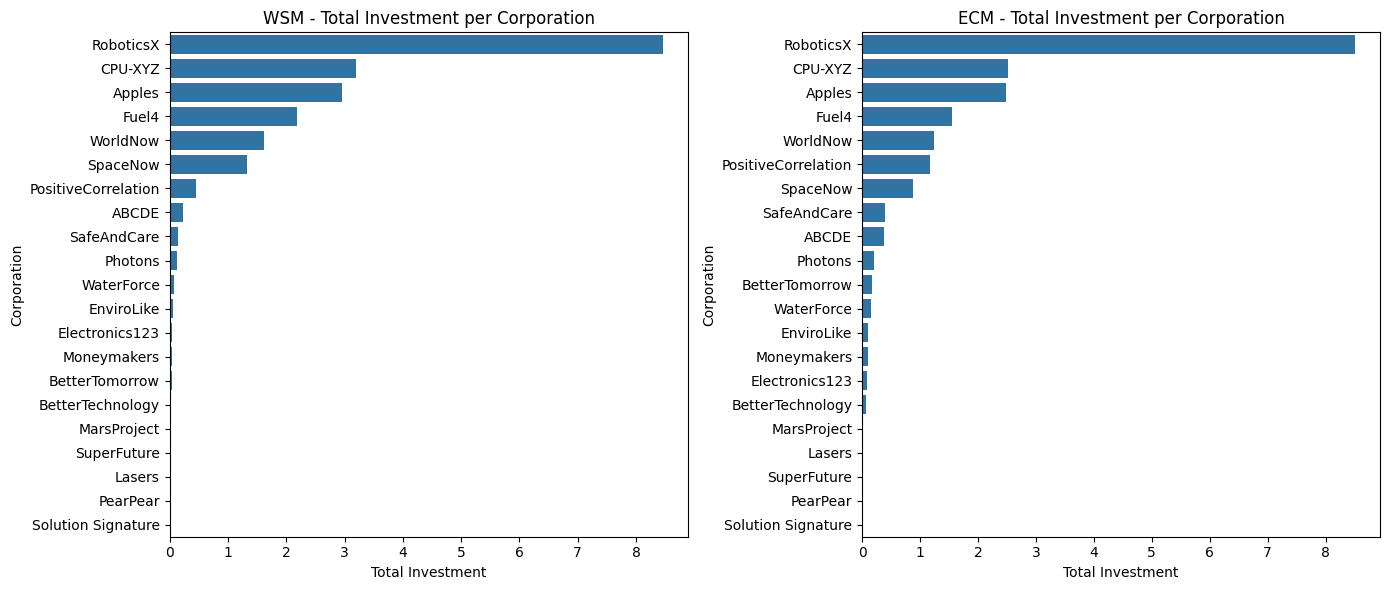

In [25]:
ER.plot_top_corporations()

### 2 to 32 Thresholds/Steps Experiments

In [26]:
thresholds = [2, 4, 8, 12, 16, 20, 32]
steps = [1/2, 1/4, 1/8, 1/16, 1/20, 1/32]

ER = ExperimentRunner(solver=solver)
ER.run_ECM(thresholds)
ER.run_WSM(steps)

Running for threshold=0.009384687021655137
     pcost       dcost       gap    pres   dres
 0:  2.2503e-03 -2.1558e+01  2e+01  2e-16  1e+00
 1:  1.9516e-03 -5.5663e-01  6e-01  2e-16  3e-02
 2:  8.5515e-04 -4.3069e-02  4e-02  2e-16  2e-03
 3:  3.5436e-04 -2.3059e-03  3e-03  2e-16  9e-17
 4:  2.2518e-04 -9.6731e-05  3e-04  4e-16  1e-16
 5:  1.8398e-04  1.4899e-04  3e-05  2e-16  1e-16
 6:  1.7706e-04  1.7531e-04  2e-06  2e-16  1e-16
 7:  1.7643e-04  1.7635e-04  8e-08  1e-16  2e-16
Optimal solution found.
Running for threshold=0.3348190584066249
     pcost       dcost       gap    pres   dres
 0:  4.1122e-03 -2.0633e+01  1e+02  2e+00  1e+00
 1:  4.7839e-02 -9.8184e+00  2e+01  3e-01  2e-01
 2:  4.9559e-01 -4.6279e+00  1e+01  1e-01  6e-02
 3:  4.7055e-01 -5.4523e-02  1e+00  1e-02  6e-03
 4:  4.9615e-01  4.6489e-01  2e-01  3e-03  2e-03
 5:  6.7602e-01  6.5368e-01  6e-02  3e-04  2e-04
 6:  6.7820e-01  6.7797e-01  6e-04  3e-06  2e-06
 7:  6.7822e-01  6.7822e-01  6e-06  3e-08  2e-08
 8:  6.7822e

In [27]:
top_ecm, top_wsm = ER.summarize()
top_wsm

Solution Signature  Frequency Method
0  (9.815938612234397e-09, 1.5451078179295476e-09...          6    WSM
1  (1.505303609763648e-06, 0.12863610652159516, 0...          6    WSM
2  (1.216349168530761e-07, 1.5351860801774105e-07...          6    WSM
3  (4.098825567045744e-09, 0.18330810819399038, 2...          5    WSM
4  (1.0365829653942317e-08, 0.17736383417163595, ...          5    WSM
5  (4.3247106951613245e-10, 0.21345186632453103, ...          3    WSM
6  (2.2683421030018778e-06, 0.1242730132494039, 8...          3    WSM
7  (1.7673024974262608e-07, 0.15858341835135983, ...          3    WSM
8  (8.445668470737867e-09, 0.16280340575983762, 0...          3    WSM
9  (9.528090510329102e-10, 0.18164968333589712, 1...          2    WSM

In [28]:
top_ecm

Solution Signature  Frequency Method
0  (1.7380525853781028e-06, 1.1646101982033194e-0...          7    ECM
1  (1.209895269926745e-09, 1.1963321360861594e-07...          7    ECM
2  (8.299530536800702e-09, 0.1715870102314486, 0....          2    ECM
3  (1.2499536489355173e-09, 0.20043509497133796, ...          2    ECM
4  (8.397968294867419e-08, 1.1058940701500709e-07...          1    ECM
5  (1.221942215607118e-08, 0.17152537205700932, 0...          1    ECM
6  (1.0918518000515306e-05, 0.1212617561355979, 0...          1    ECM
7  (1.262305227691434e-08, 0.1580912773526239, 8....          1    ECM
8  (1.6502314440409497e-10, 0.22218405893667642, ...          1    ECM
9  (5.161499599506547e-10, 0.20917374035608433, 2...          1    ECM

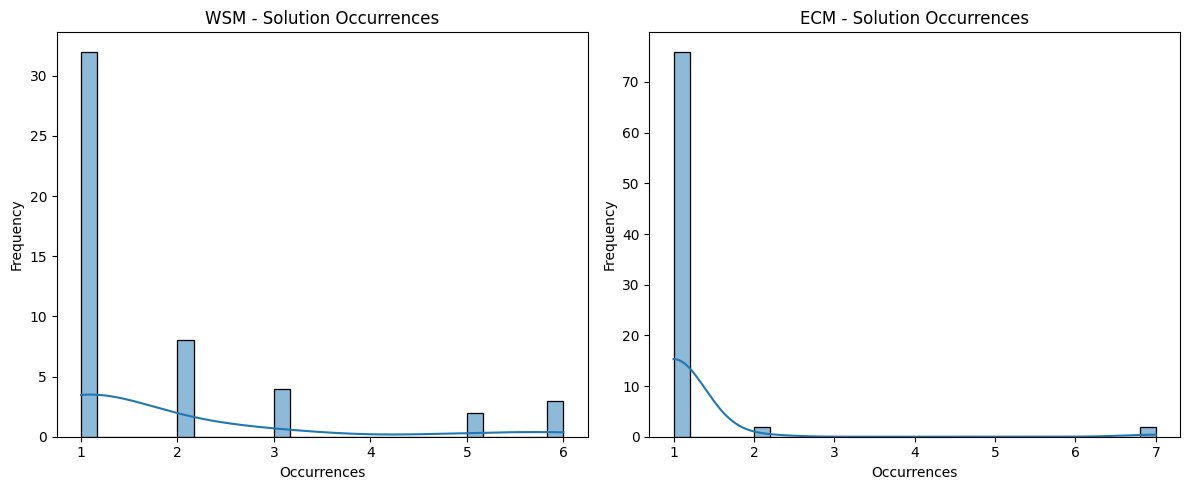

In [29]:
ER.plot_results()

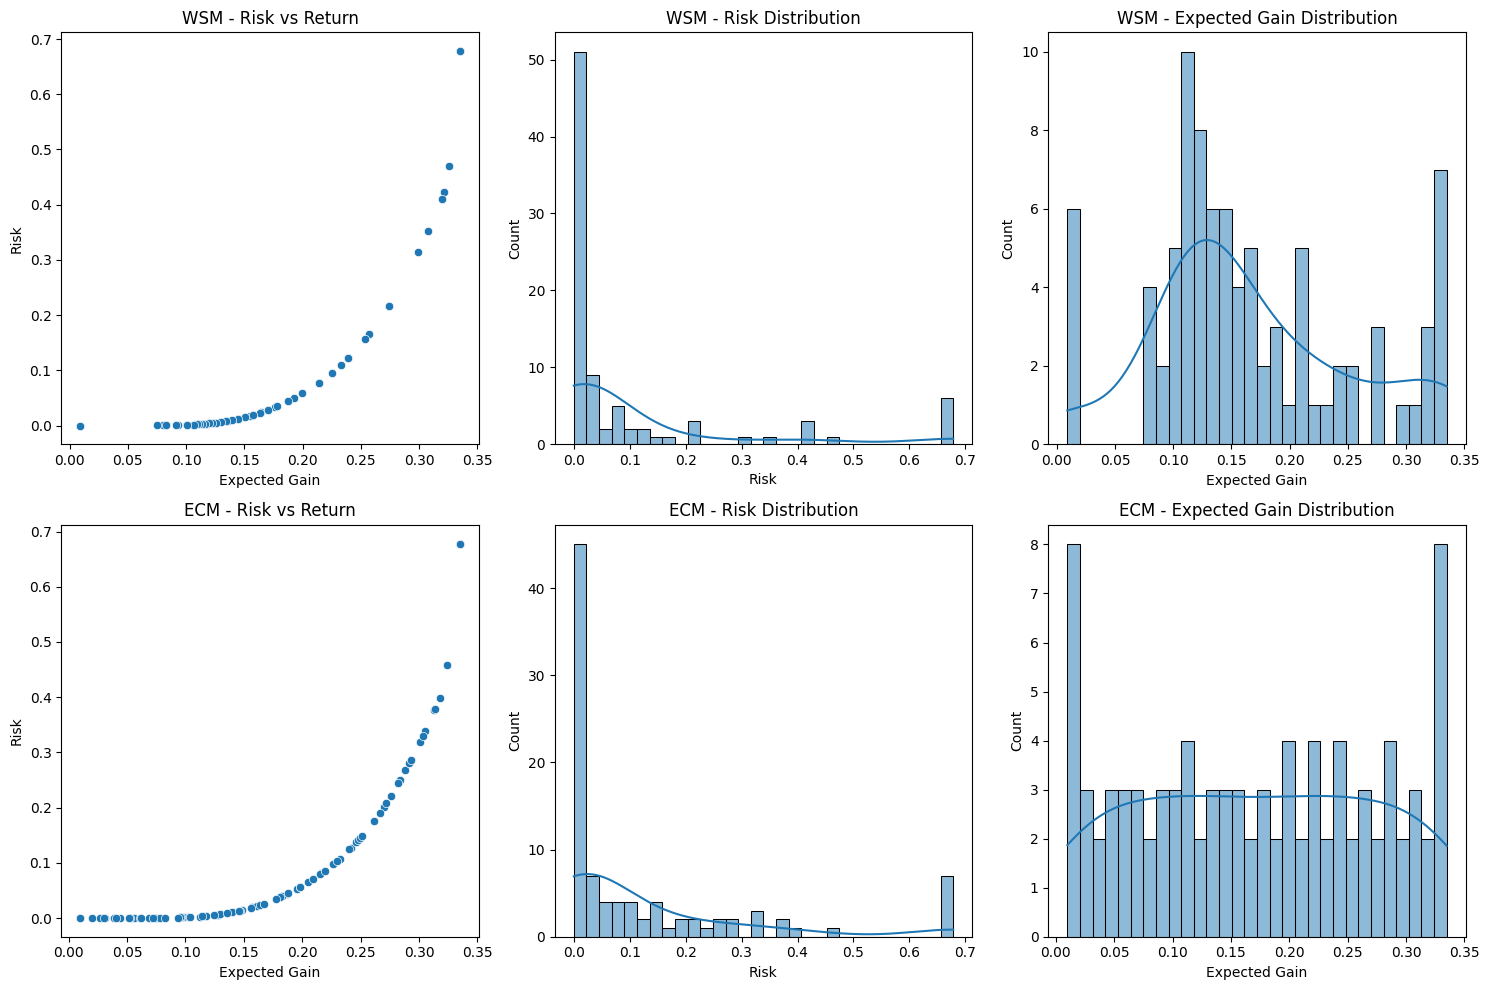

In [30]:
ER.plot_risk_return_distribution()

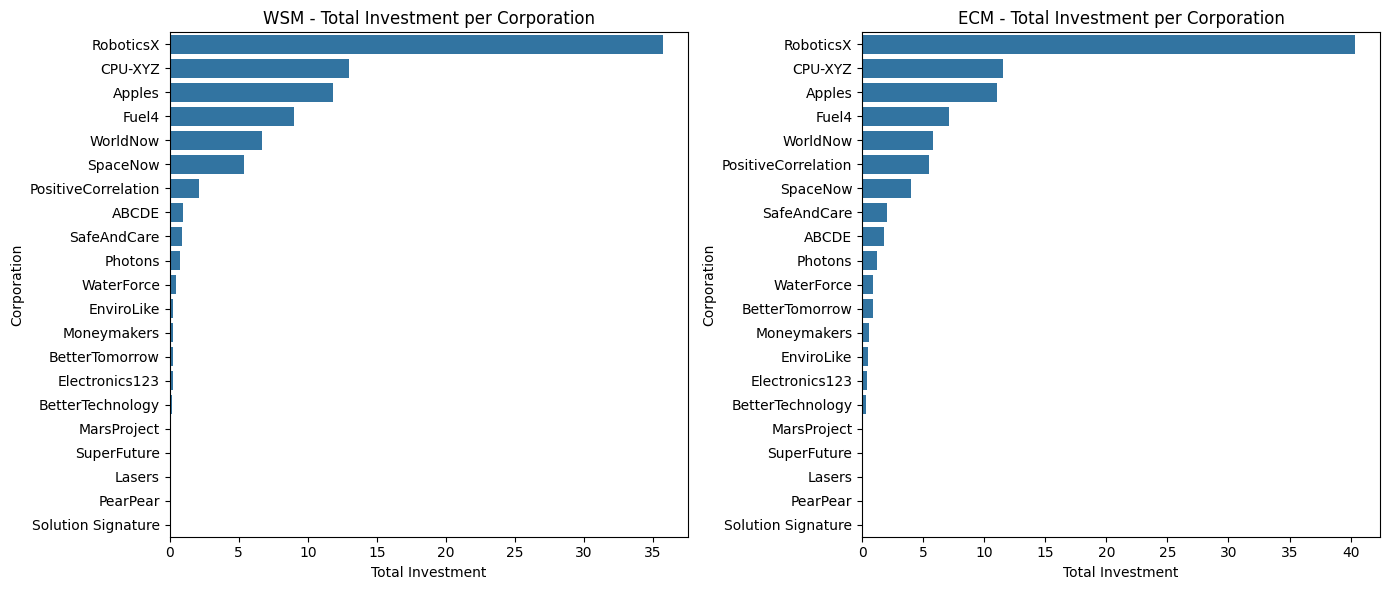

In [31]:
ER.plot_top_corporations()

### 2 to 256 Thresholds/Steps Experiments

In [32]:
thresholds = [2, 4, 8, 12, 16, 20, 32, 64, 128, 256]
steps = [1/2, 1/4, 1/8, 1/16, 1/20, 1/32, 1/64, 1/128, 1/256]

ER = ExperimentRunner(solver=solver)
ER.run_ECM(thresholds)
ER.run_WSM(steps)

Running for threshold=0.009384687021655137
     pcost       dcost       gap    pres   dres
 0:  2.2503e-03 -2.1558e+01  2e+01  2e-16  1e+00
 1:  1.9516e-03 -5.5663e-01  6e-01  2e-16  3e-02
 2:  8.5515e-04 -4.3069e-02  4e-02  2e-16  2e-03
 3:  3.5436e-04 -2.3059e-03  3e-03  2e-16  9e-17
 4:  2.2518e-04 -9.6731e-05  3e-04  4e-16  1e-16
 5:  1.8398e-04  1.4899e-04  3e-05  2e-16  1e-16
 6:  1.7706e-04  1.7531e-04  2e-06  2e-16  1e-16
 7:  1.7643e-04  1.7635e-04  8e-08  1e-16  2e-16
Optimal solution found.
Running for threshold=0.3348190584066249
     pcost       dcost       gap    pres   dres
 0:  4.1122e-03 -2.0633e+01  1e+02  2e+00  1e+00
 1:  4.7839e-02 -9.8184e+00  2e+01  3e-01  2e-01
 2:  4.9559e-01 -4.6279e+00  1e+01  1e-01  6e-02
 3:  4.7055e-01 -5.4523e-02  1e+00  1e-02  6e-03
 4:  4.9615e-01  4.6489e-01  2e-01  3e-03  2e-03
 5:  6.7602e-01  6.5368e-01  6e-02  3e-04  2e-04
 6:  6.7820e-01  6.7797e-01  6e-04  3e-06  2e-06
 7:  6.7822e-01  6.7822e-01  6e-06  3e-08  2e-08
 8:  6.7822e

In [33]:
top_ecm, top_wsm = ER.summarize()
top_wsm

Solution Signature  Frequency Method
0  (1.505303609763648e-06, 0.12863610652159516, 0...          9    WSM
1  (1.216349168530761e-07, 1.5351860801774105e-07...          9    WSM
2  (9.815938612234397e-09, 1.5451078179295476e-09...          9    WSM
3  (4.098825567045744e-09, 0.18330810819399038, 2...          8    WSM
4  (1.0365829653942317e-08, 0.17736383417163595, ...          8    WSM
5  (2.2683421030018778e-06, 0.1242730132494039, 8...          6    WSM
6  (4.3247106951613245e-10, 0.21345186632453103, ...          6    WSM
7  (1.7673024974262608e-07, 0.15858341835135983, ...          6    WSM
8  (8.445668470737867e-09, 0.16280340575983762, 0...          6    WSM
9  (9.315232478288558e-09, 0.16943671130618748, 0...          5    WSM

In [34]:
top_ecm

Solution Signature  Frequency Method
0  (1.209895269926745e-09, 1.1963321360861594e-07...         10    ECM
1  (1.7380525853781028e-06, 1.1646101982033194e-0...         10    ECM
2  (8.299530536800702e-09, 0.1715870102314486, 0....          4    ECM
3  (1.2499536489355173e-09, 0.20043509497133796, ...          4    ECM
4  (1.9760099908395776e-06, 0.11239568823602582, ...          2    ECM
5  (1.1933090371261793e-06, 0.1414749039367082, 8...          2    ECM
6  (1.0108426231045464e-08, 0.17055388605105573, ...          2    ECM
7  (4.63037160482636e-09, 0.2213314498075154, 2.1...          2    ECM
8  (5.079256275936465e-10, 0.2147850525411322, 3....          2    ECM
9  (5.067913857251336e-10, 0.20823852165800832, 2...          2    ECM

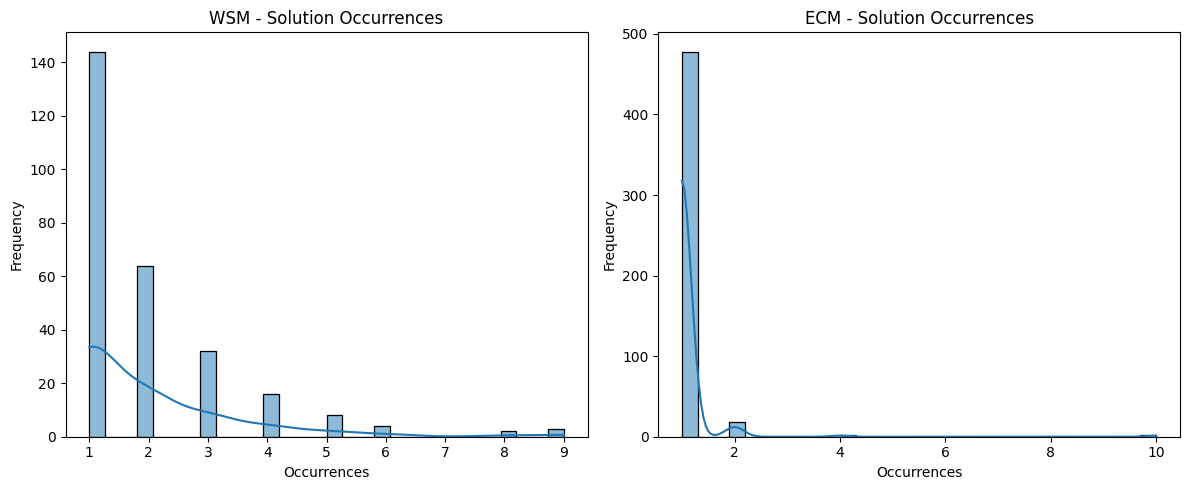

In [35]:
ER.plot_results()

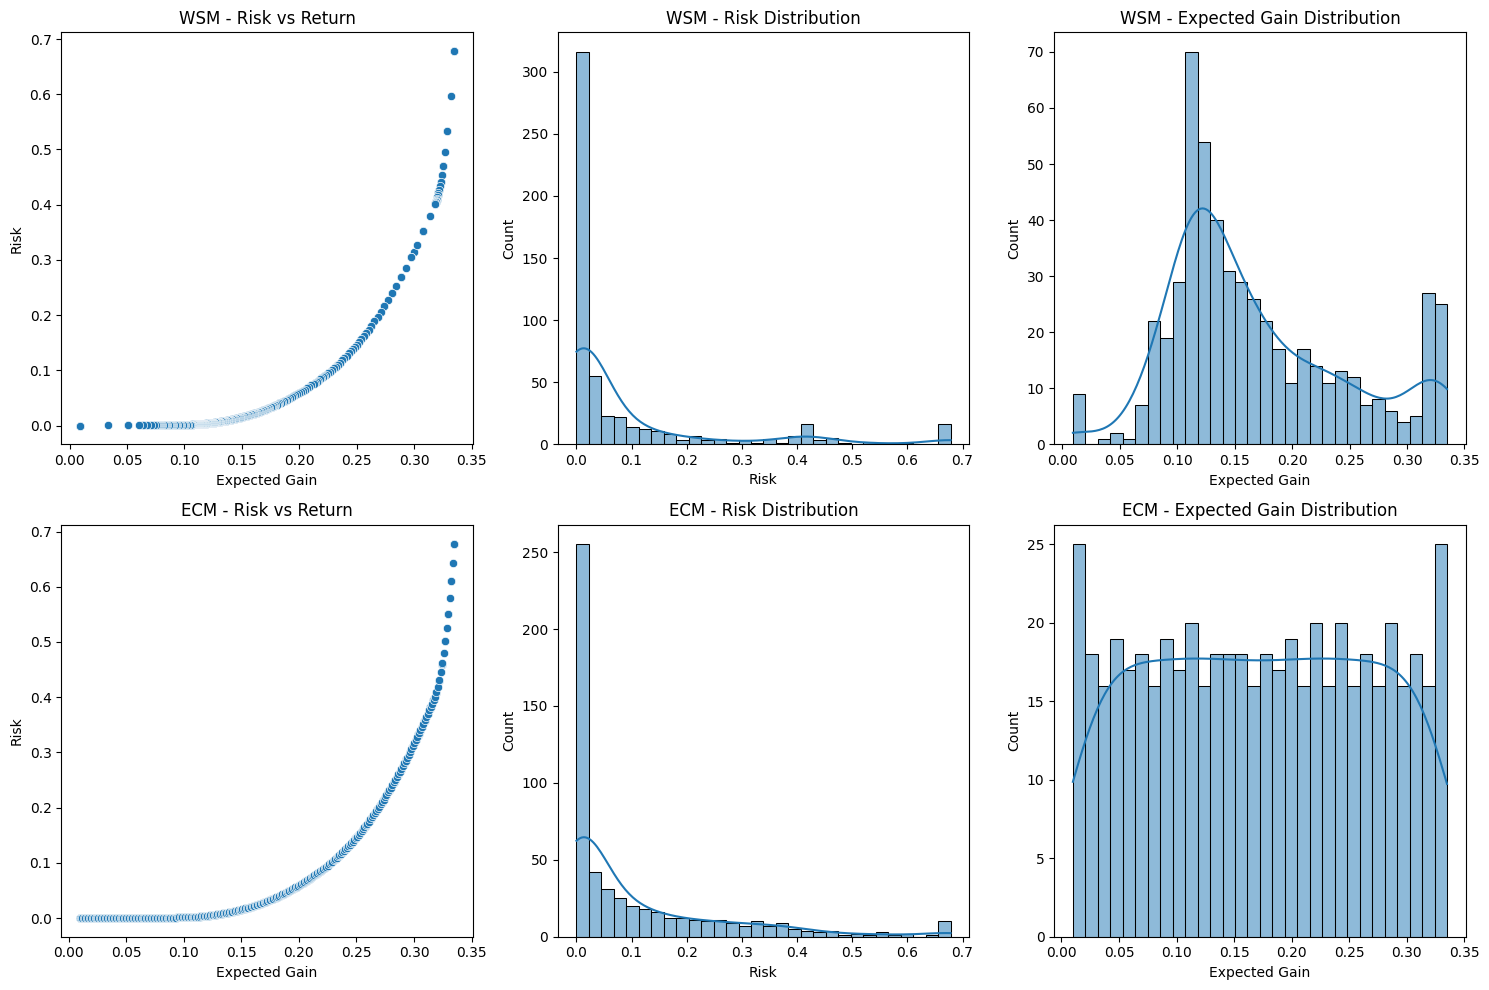

In [36]:
ER.plot_risk_return_distribution()

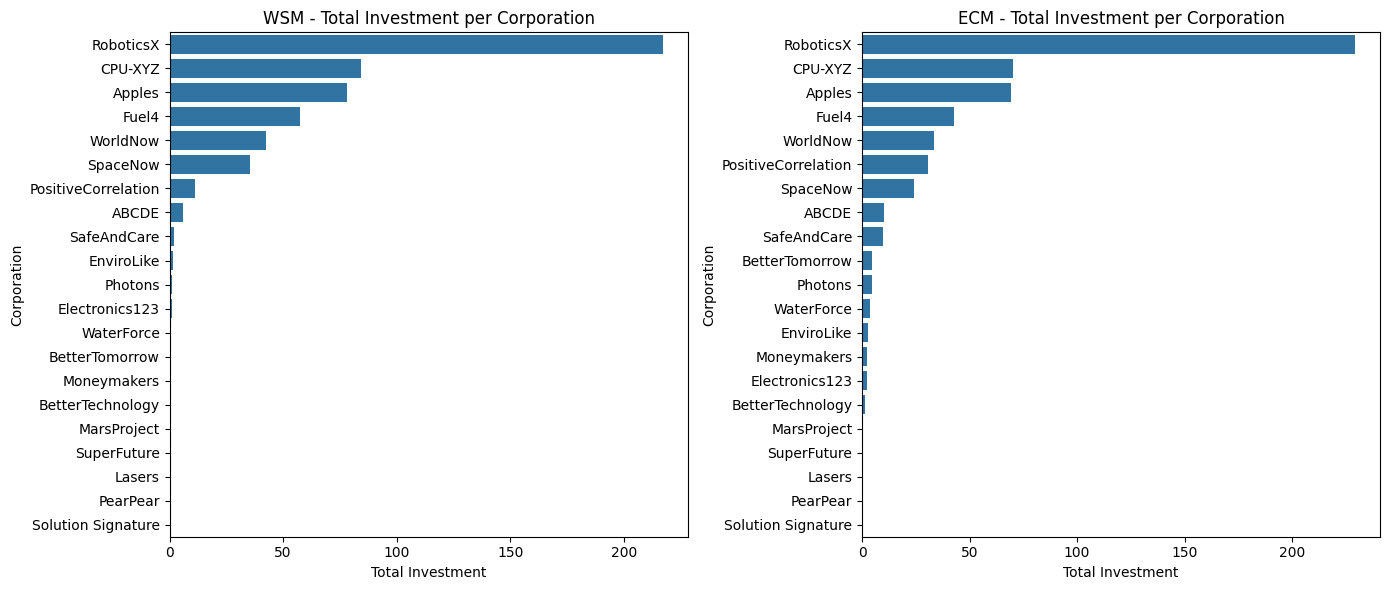

In [37]:
ER.plot_top_corporations()